In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error
from sklearn.metrics import roc_auc_score,recall_score,make_scorer,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,auc
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.utils import  shuffle
from catboost import CatBoostClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.combine import SMOTETomek,SMOTEENN


### importing Data

In [2]:
df = pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [3]:
X = df.drop(["CONS_NO","FLAG"],axis=1)

In [4]:
y = df.FLAG

In [5]:
X = np.array(X.values)
y = np.array(y.values)

<AxesSubplot:xlabel='FLAG', ylabel='count'>

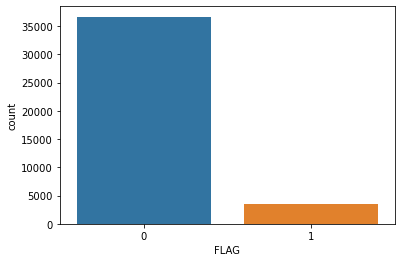

In [6]:
sns.countplot(x= df["FLAG"])

In [7]:
print(f"the total amount of people: {len(y)}")

the total amount of people: 40256


In [8]:
print(f"theft flagged :{sum(y)}")

theft flagged :3579


In [9]:
print(f"total no of normal customers: {len(y)-sum(y)}")

total no of normal customers: 36677


### Modeling under normal condidtions

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y, train_size=0.2)

light boosting model

In [11]:
#light boosting classifier
model_light= LGBMClassifier(n_jobs=-1)
model_light.fit(x_train,y_train)
y_light_norm = model_light.predict(x_test)

In [12]:
print(classification_report(y_test,y_light_norm))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     29319
           1       0.67      0.05      0.09      2886

    accuracy                           0.91     32205
   macro avg       0.79      0.52      0.52     32205
weighted avg       0.89      0.91      0.88     32205



In [13]:
matthews_corrcoef(y_test,y_light_norm)

0.16367601650785704

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix LGBoost, W/O Sampling
[[29249    70]
 [ 2746   140]]
Normalized Confusion Matrix LGBOOST, W/O Sampling
[[0.99761247 0.00238753]
 [0.95148995 0.04851005]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


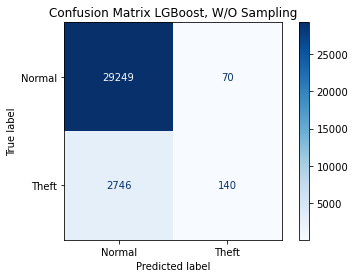

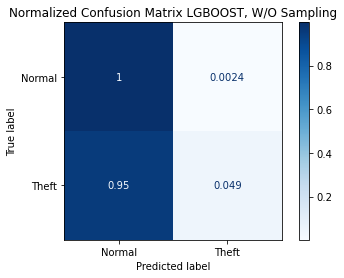

In [14]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix LGBoost, W/O Sampling",None),
         ("Normalized Confusion Matrix LGBOOST, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_light,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [15]:
probs_ln = model_light.predict_proba(x_test)
preds_ln = probs_ln[:,1]
fpr_ln,tpr_ln,thresold = roc_curve(y_test,preds_ln)
roc_auc_ln = auc(fpr_ln,tpr_ln)

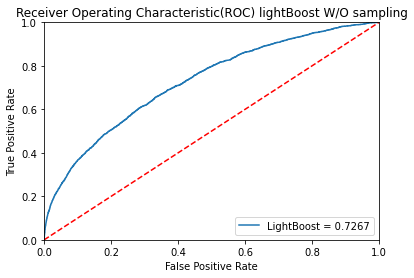

In [16]:
plt.title("Receiver Operating Characteristic(ROC) lightBoost W/O sampling")
plt.plot(fpr_ln,tpr_ln,label="LightBoost = %0.4f" %roc_auc_ln)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Gradient Boosting

In [ ]:
#light boosting classifier
model_grad= GradientBoostingClassifier()
model_grad.fit(x_train,y_train)


In [ ]:
y_grad_norm = model_grad.predict(x_test)
print(classification_report(y_test,y_grad_norm))

In [ ]:
matthews_corrcoef(y_test,y_grad_norm)

In [ ]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix Gradient Boost, W/O Sampling",None),
         ("Normalized Confusion Matrix GradientBoost, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grad,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [ ]:
probs_gn = model_grad.predict_proba(x_test)
preds_gn = probs_gn[:,1]
fpr_gn,tpr_gn,thresold = roc_curve(y_test,preds_gn)
roc_auc_gn = auc(fpr_gn,tpr_gn)

In [ ]:
plt.title("Receiver Operating Characteristic(ROC) GradientBoost W/O sampling")
plt.plot(fpr_gn,tpr_gn,label="GradientBoost = %0.4f" %roc_auc_gn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Xtreme Gradient boosting

In [23]:
model_Xgboost =XGBClassifier(n_jobs=-1)
model_Xgboost.fit(x_train,y_train)
y_xgboost_norm = model_Xgboost.predict(x_test)
print(classification_report(y_test,y_xgboost_norm))


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:14:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     29319
           1       0.62      0.06      0.10      2886

    accuracy                           0.91     32205
   macro avg       0.77      0.53      0.53     32205
weighted avg       0.89      0.91      0.88     32205



In [24]:
matthews_corrcoef(y_test,y_xgboost_norm)

0.16771060830211126

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix Extreme Gradient Boost, W/O Sampling
[[29221    98]
 [ 2725   161]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Extreme Gradient Boost, W/O Sampling
[[0.99665746 0.00334254]
 [0.94421344 0.05578656]]


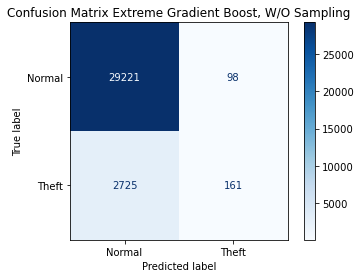

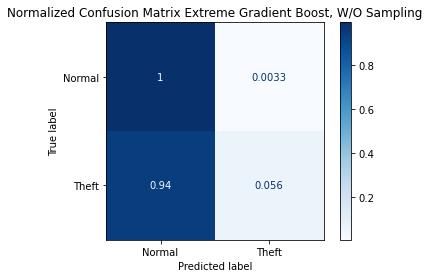

In [25]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix Extreme Gradient Boost, W/O Sampling",None),
         ("Normalized Confusion Matrix Extreme Gradient Boost, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_Xgboost,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [26]:
probs_xbgn = model_Xgboost.predict_proba(x_test)
preds_xbgn = probs_xbgn[:,1]
fpr_xbgn,tpr_xbgn,thresold = roc_curve(y_test,preds_xbgn)
roc_auc_xbgn = auc(fpr_xbgn,tpr_xbgn)

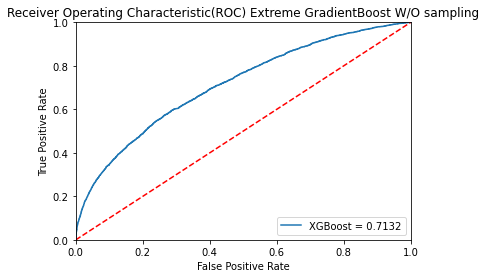

In [27]:
plt.title("Receiver Operating Characteristic(ROC) Extreme GradientBoost W/O sampling")
plt.plot(fpr_xbgn,tpr_xbgn,label="XGBoost = %0.4f" %roc_auc_xbgn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Adaboost classifier

In [ ]:
model_ada=AdaBoostClassifier()
model_ada.fit(x_train,y_train)
y_ada_norm = model_ada.predict(x_test)
print(classification_report(y_test,y_ada_norm))


In [ ]:
matthews_corrcoef(y_test,y_ada_norm)

In [ ]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  AdaBoost, W/O Sampling",None),
         ("Normalized Confusion Matrix AdaBoost, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [31]:
probs_adan = model_ada.predict_proba(x_test)
preds_adan = probs_adan[:,1]
fpr_adan,tpr_adan,thresold = roc_curve(y_test,preds_adan)
roc_auc_adan = auc(fpr_adan,tpr_adan)

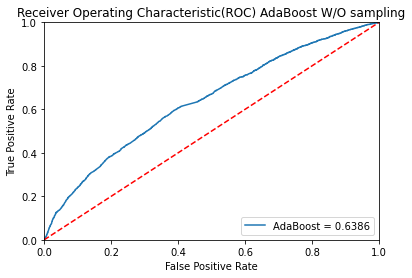

In [32]:
plt.title("Receiver Operating Characteristic(ROC) AdaBoost W/O sampling")
plt.plot(fpr_adan,tpr_adan,label="AdaBoost = %0.4f" %roc_auc_adan)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Extra Trees Classifier

In [8]:
model_extra_op1 =ExtraTreesClassifier(n_jobs=-1,max_depth=72,n_estimators=500,verbose = 0)
model_extra_op1.fit(x_train,y_train)
y_extra_norm1 = model_extra_op1.predict(x_test)
print(classification_report(y_test,y_extra_norm1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     29362
           1       0.69      0.03      0.06      2843

    accuracy                           0.91     32205
   macro avg       0.80      0.52      0.51     32205
weighted avg       0.89      0.91      0.88     32205



In [9]:
matthews_corrcoef(y_test,y_extra_norm1)

0.1369767768227032

In [ ]:
model_extra_op =ExtraTreesClassifier(n_jobs=-1,max_depth=70,n_estimators=500,verbose = 0)
model_extra_op.fit(x_train,y_train)
y_extra_norm = model_extra_op.predict(x_test)
print(classification_report(y_test,y_extra_norm))

In [226]:
matthews_corrcoef(y_test,y_extra_norm)

0.14433894592850585

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix  Proposed Model Classfier, W/O Sampling
[[29319    30]
 [ 2764    92]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Proposed Model Classifier, W/O Sampling
[[0.99897782 0.00102218]
 [0.96778711 0.03221289]]


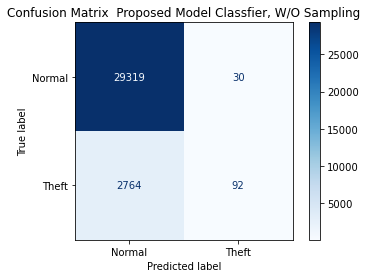

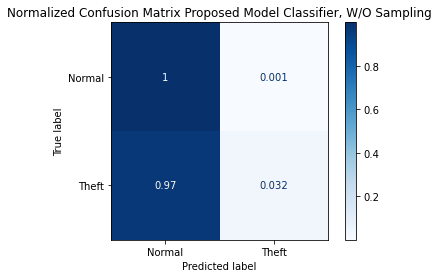

In [227]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  Proposed Model Classfier, W/O Sampling",None),
         ("Normalized Confusion Matrix Proposed Model Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_extra_op,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [228]:
probs_exn = model_extra_op.predict_proba(x_test)
preds_exn = probs_exn[:,1]
fpr_exn,tpr_exn,thresold = roc_curve(y_test,preds_exn)
roc_auc_exn = auc(fpr_exn,tpr_exn)

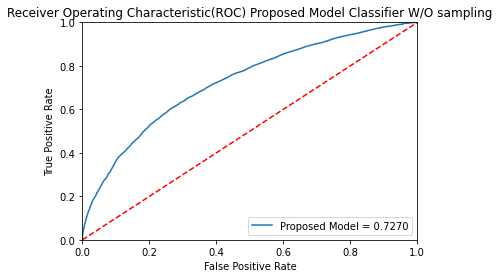

In [231]:
plt.title("Receiver Operating Characteristic(ROC) Proposed Model Classifier W/O sampling")
plt.plot(fpr_exn,tpr_exn,label="Proposed Model = %0.4f" %roc_auc_exn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Decision Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_dt_norm = model_dt.predict(x_test)
print(classification_report(y_test,y_dt_norm))

In [39]:
matthews_corrcoef(y_test,y_dt_norm)

0.07333072779559031

Confusion Matrix  Decision Tree Classfier, W/O Sampling
[[26529  2790]
 [ 2387   499]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Decision Trees Classifier, W/O Sampling
[[0.90483986 0.09516014]
 [0.82709633 0.17290367]]


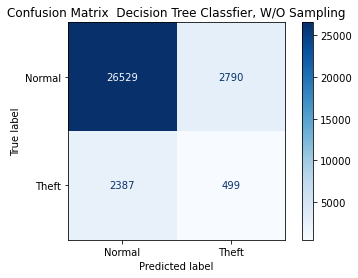

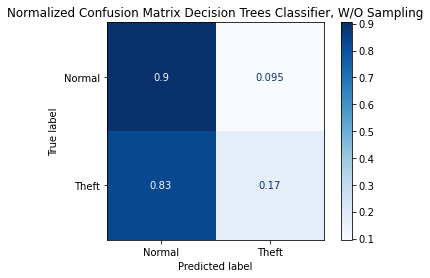

In [40]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  Decision Tree Classfier, W/O Sampling",None),
         ("Normalized Confusion Matrix Decision Trees Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_dt,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [41]:
probs_dtn = model_dt.predict_proba(x_test)
preds_dtn = probs_dtn[:,1]
fpr_dtn,tpr_dtn,thresold = roc_curve(y_test,preds_dtn)
roc_auc_dtn = auc(fpr_dtn,tpr_dtn)

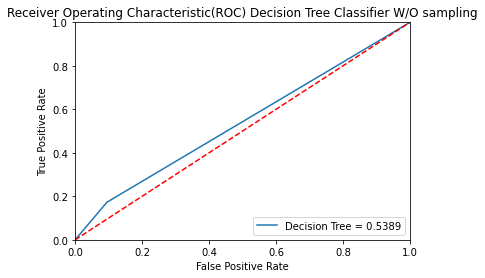

In [42]:
plt.title("Receiver Operating Characteristic(ROC) Decision Tree Classifier W/O sampling")
plt.plot(fpr_dtn,tpr_dtn,label="Decision Tree = %0.4f" %roc_auc_dtn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Random Forest Classifier

In [43]:
model_rf = RandomForestClassifier(n_jobs=-1)
model_rf.fit(x_train,y_train)
y_rf_norm = model_rf.predict(x_test)
print(classification_report(y_test,y_rf_norm))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     29319
           1       0.67      0.02      0.03      2886

    accuracy                           0.91     32205
   macro avg       0.79      0.51      0.49     32205
weighted avg       0.89      0.91      0.87     32205



In [44]:
matthews_corrcoef(y_test,y_rf_norm)

0.09563284323617705

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix  Random Forest Classfier, W/O Sampling
[[29295    24]
 [ 2838    48]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Random Foreset Classifier, W/O Sampling
[[9.99181418e-01 8.18581807e-04]
 [9.83367983e-01 1.66320166e-02]]


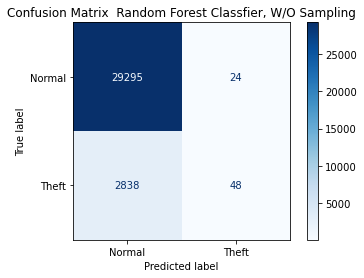

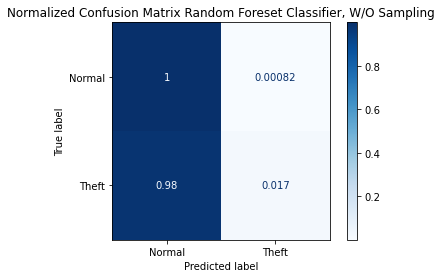

In [45]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  Random Forest Classfier, W/O Sampling",None),
         ("Normalized Confusion Matrix Random Foreset Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rf,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [46]:
probs_rfn = model_rf.predict_proba(x_test)
preds_rfn = probs_rfn[:,1]
fpr_rfn,tpr_rfn,thresold = roc_curve(y_test,preds_rfn)
roc_auc_rfn = auc(fpr_rfn,tpr_rfn)

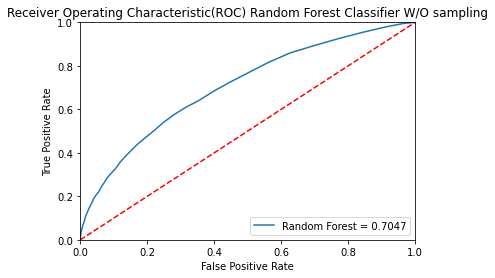

In [47]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest Classifier W/O sampling")
plt.plot(fpr_rfn,tpr_rfn,label="Random Forest = %0.4f" %roc_auc_rfn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

catboosting model

In [48]:
model_cat = CatBoostClassifier(verbose=0,task_type="GPU")
model_cat.fit(x_train,y_train)
y_cat_norm = model_cat.predict(x_test)
print(classification_report(y_test,y_cat_norm))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     29319
           1       0.68      0.05      0.10      2886

    accuracy                           0.91     32205
   macro avg       0.80      0.53      0.53     32205
weighted avg       0.89      0.91      0.88     32205



In [49]:
matthews_corrcoef(y_test,y_cat_norm)

0.17528357586612522

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix  Catboost Model, W/O Sampling
[[29246    73]
 [ 2730   156]]
Normalized Confusion Matrix Catboost Model Classifier, W/O Sampling
[[0.99751015 0.00248985]
 [0.94594595 0.05405405]]


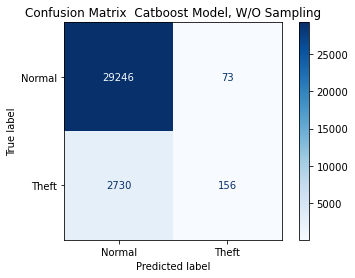

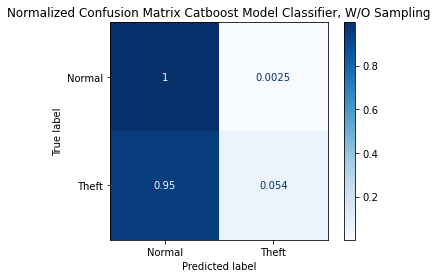

In [50]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  Catboost Model, W/O Sampling",None),
         ("Normalized Confusion Matrix Catboost Model Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_cat,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [51]:
probs_opn = model_cat.predict_proba(x_test)
preds_opn = probs_opn[:,1]
fpr_opn,tpr_opn,thresold = roc_curve(y_test,preds_opn)
roc_auc_opn = auc(fpr_opn,tpr_opn)

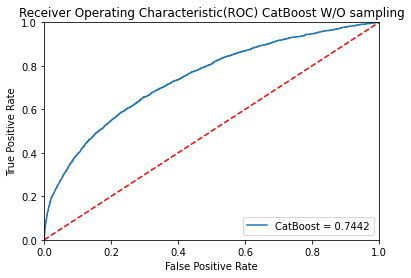

In [52]:
plt.title("Receiver Operating Characteristic(ROC) CatBoost W/O sampling")
plt.plot(fpr_opn,tpr_opn,label="CatBoost = %0.4f" %roc_auc_opn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## skip this

Proposed optimized catboosting model

In [48]:
model_opcat = CatBoostClassifier(max_depth=10,verbose=0,task_type="GPU")
model_opcat.fit(x_train,y_train)
y_opcat_norm = model_opcat.predict(x_test)
print(classification_report(y_test,y_opcat_norm))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     29319
           1       0.78      0.03      0.06      2886

    accuracy                           0.91     32205
   macro avg       0.85      0.51      0.51     32205
weighted avg       0.90      0.91      0.87     32205



In [49]:
matthews_corrcoef(y_test,y_opcat_norm)

0.14082029897772533

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix  Proposed Model, W/O Sampling
[[29295    24]
 [ 2801    85]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Proposed Model Classifier, W/O Sampling
[[9.99181418e-01 8.18581807e-04]
 [9.70547471e-01 2.94525295e-02]]


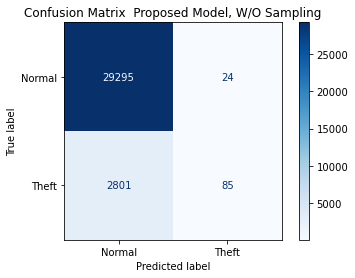

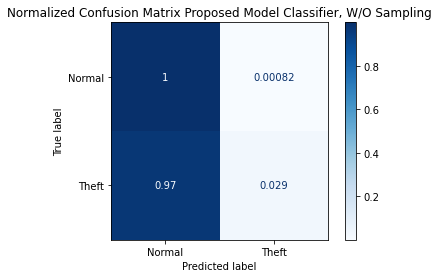

In [50]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  Proposed Model, W/O Sampling",None),
         ("Normalized Confusion Matrix Proposed Model Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_opcat,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [51]:
probs_opn = model_opcat.predict_proba(x_test)
preds_opn = probs_opn[:,1]
fpr_opn,tpr_opn,thresold = roc_curve(y_test,preds_opn)
roc_auc_opn = auc(fpr_opn,tpr_opn)

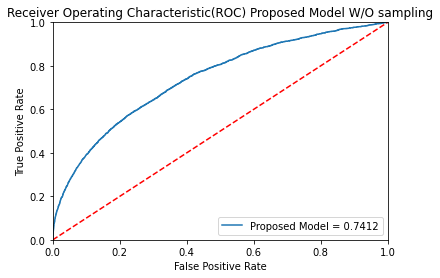

In [52]:
plt.title("Receiver Operating Characteristic(ROC) Proposed Model W/O sampling")
plt.plot(fpr_opn,tpr_opn,label="Proposed Model = %0.4f" %roc_auc_opn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Simulating for KNN

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_knn_norm = model_knn.predict(x_test)
print(classification_report(y_test,y_knn_norm))


In [54]:
matthews_corrcoef(y_test,y_knn_norm)

0.11434232834871233

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix  KNN Classifier, W/O Sampling
[[29004   315]
 [ 2714   172]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix KNN Classifier, W/O Sampling
[[0.98925611 0.01074389]
 [0.94040194 0.05959806]]


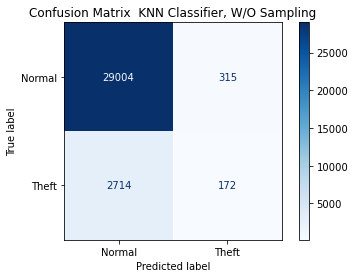

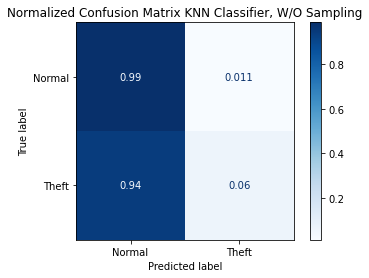

In [55]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  KNN Classifier, W/O Sampling",None),
         ("Normalized Confusion Matrix KNN Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_knn,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [56]:
probs_knn = model_knn.predict_proba(x_test)
preds_knn = probs_knn[:,1]
fpr_knn,tpr_knn,thresold = roc_curve(y_test,preds_knn)
roc_auc_knn = auc(fpr_knn,tpr_knn)

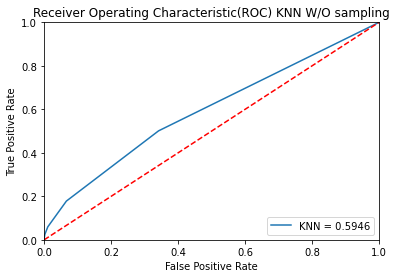

In [57]:
plt.title("Receiver Operating Characteristic(ROC) KNN W/O sampling")
plt.plot(fpr_knn,tpr_knn,label="KNN = %0.4f" %roc_auc_knn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

simulating for LDA

In [58]:
mod_lda = LinearDiscriminantAnalysis()
mod_lda.fit(x_train,y_train)
y_pred_ldan =mod_lda.predict(x_test)
print(classification_report(y_test,y_pred_ldan))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     29319
           1       0.22      0.07      0.11      2886

    accuracy                           0.89     32205
   macro avg       0.57      0.52      0.52     32205
weighted avg       0.85      0.89      0.87     32205



In [59]:
matthews_corrcoef(y_test,y_pred_ldan)

0.07765698151261359

Confusion Matrix  LDA Classifier, W/O Sampling
[[28614   705]
 [ 2687   199]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix LDA Classifier, W/O Sampling
[[0.97595416 0.02404584]
 [0.93104643 0.06895357]]


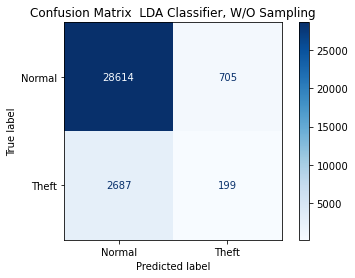

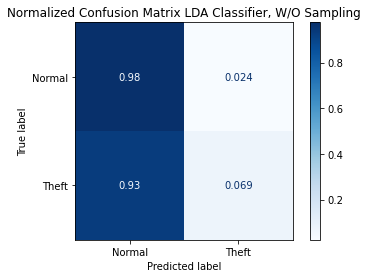

In [60]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  LDA Classifier, W/O Sampling",None),
         ("Normalized Confusion Matrix LDA Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(mod_lda,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [61]:
probs_ldan = mod_lda.predict_proba(x_test)
preds_ldan = probs_ldan[:,1]
fpr_ldan,tpr_ldan,thresold = roc_curve(y_test,preds_ldan)
roc_auc_ldan = auc(fpr_ldan,tpr_ldan)

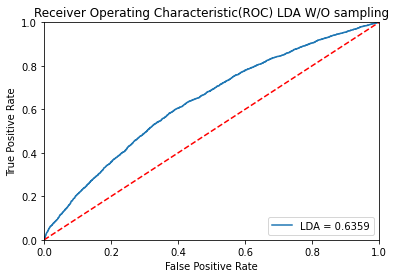

In [62]:
plt.title("Receiver Operating Characteristic(ROC) LDA W/O sampling")
plt.plot(fpr_ldan,tpr_ldan,label="LDA = %0.4f" %roc_auc_ldan)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

##### Logistic Regression

In [ ]:
model_regress = LogisticRegression(max_iter=2000)
model_regress.fit(x_train,y_train)
y_pred_regress_n = model_regress.predict(x_test)
print(classification_report(y_test,y_pred_regress_n))

In [64]:
matthews_corrcoef(y_test,y_pred_regress_n)

0.07847357197845413

Confusion Matrix  Logistic Regression Classifier, W/O Sampling
[[29051   268]
 [ 2774   112]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Logistic Regression Classifier, W/O Sampling
[[0.99085917 0.00914083]
 [0.96119196 0.03880804]]


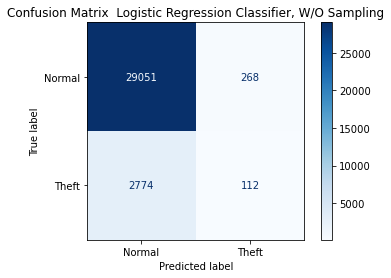

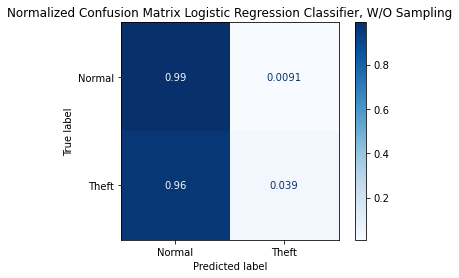

In [65]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  Logistic Regression Classifier, W/O Sampling",None),
         ("Normalized Confusion Matrix Logistic Regression Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_regress,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [66]:
probs_regress_n = model_regress.predict_proba(x_test)
preds_regress_n = probs_regress_n[:,1]
fpr_regress_n,tpr_regress_n,thresold = roc_curve(y_test,preds_regress_n)
roc_auc_regress_n = auc(fpr_regress_n,tpr_regress_n)

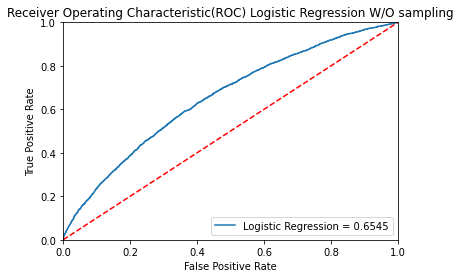

In [67]:
plt.title("Receiver Operating Characteristic(ROC) Logistic Regression W/O sampling")
plt.plot(fpr_regress_n,tpr_regress_n,label="Logistic Regression = %0.4f" %roc_auc_regress_n)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

#### simulating SVM for normal 

In [ ]:
model_svm = SVC(probability = True)
model_svm.fit(x_train,y_train)
y_pred_svm_n = model_svm.predict(x_test)
print(classification_report(y_test,y_pred_svm_n))

In [69]:
matthews_corrcoef(y_test,y_pred_svm_n)

0.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix  SVM Classifier, W/O Sampling
[[29319     0]
 [ 2886     0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix SVM Classifier, W/O Sampling
[[1. 0.]
 [1. 0.]]


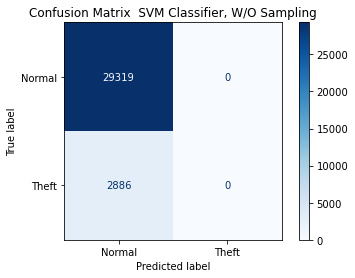

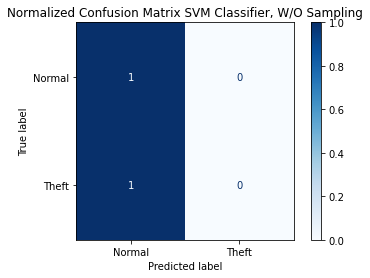

In [70]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix  SVM Classifier, W/O Sampling",None),
         ("Normalized Confusion Matrix SVM Classifier, W/O Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_svm,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [71]:
probs_svm_n = model_svm.predict_proba(x_test)
preds_svm_n = probs_svm_n[:,1]
fpr_svm_n,tpr_svm_n,thresold = roc_curve(y_test,preds_svm_n)
roc_auc_svm_n = auc(fpr_svm_n,tpr_svm_n)

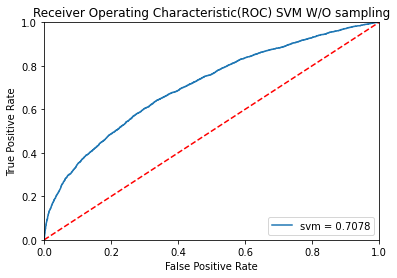

In [72]:
plt.title("Receiver Operating Characteristic(ROC) SVM W/O sampling")
plt.plot(fpr_svm_n,tpr_svm_n,label="svm = %0.4f" %roc_auc_svm_n)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

##### trying to plot ensemble

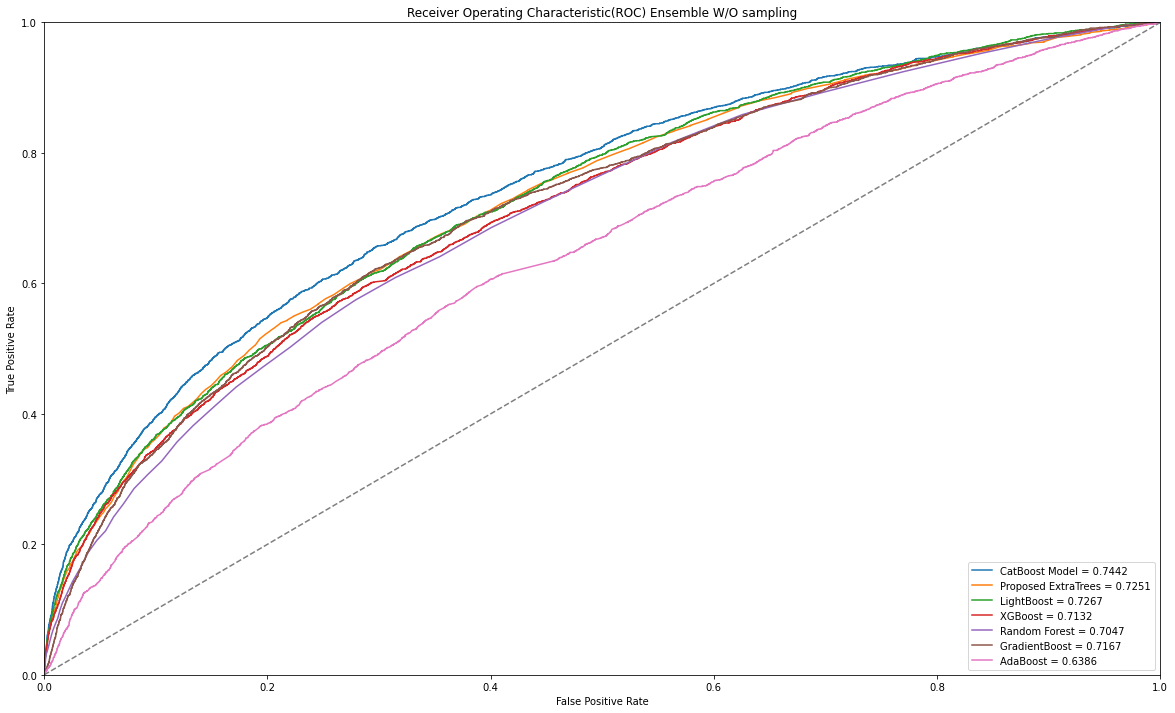

<Figure size 1440x1440 with 0 Axes>

In [73]:
plt.figure(figsize=(20,12))
plt.title("Receiver Operating Characteristic(ROC) Ensemble W/O sampling")
plt.plot(fpr_opn,tpr_opn,label="CatBoost Model = %0.4f" %roc_auc_opn)
plt.plot(fpr_exn,tpr_exn,label="Proposed ExtraTrees = %0.4f" %roc_auc_exn)
plt.plot(fpr_ln,tpr_ln,label="LightBoost = %0.4f" %roc_auc_ln)
plt.plot(fpr_xbgn,tpr_xbgn,label="XGBoost = %0.4f" %roc_auc_xbgn)
plt.plot(fpr_rfn,tpr_rfn,label="Random Forest = %0.4f" %roc_auc_rfn)
plt.plot(fpr_gn,tpr_gn,label="GradientBoost = %0.4f" %roc_auc_gn)
plt.plot(fpr_adan,tpr_adan,label="AdaBoost = %0.4f" %roc_auc_adan)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

In [74]:
# trying to plot all

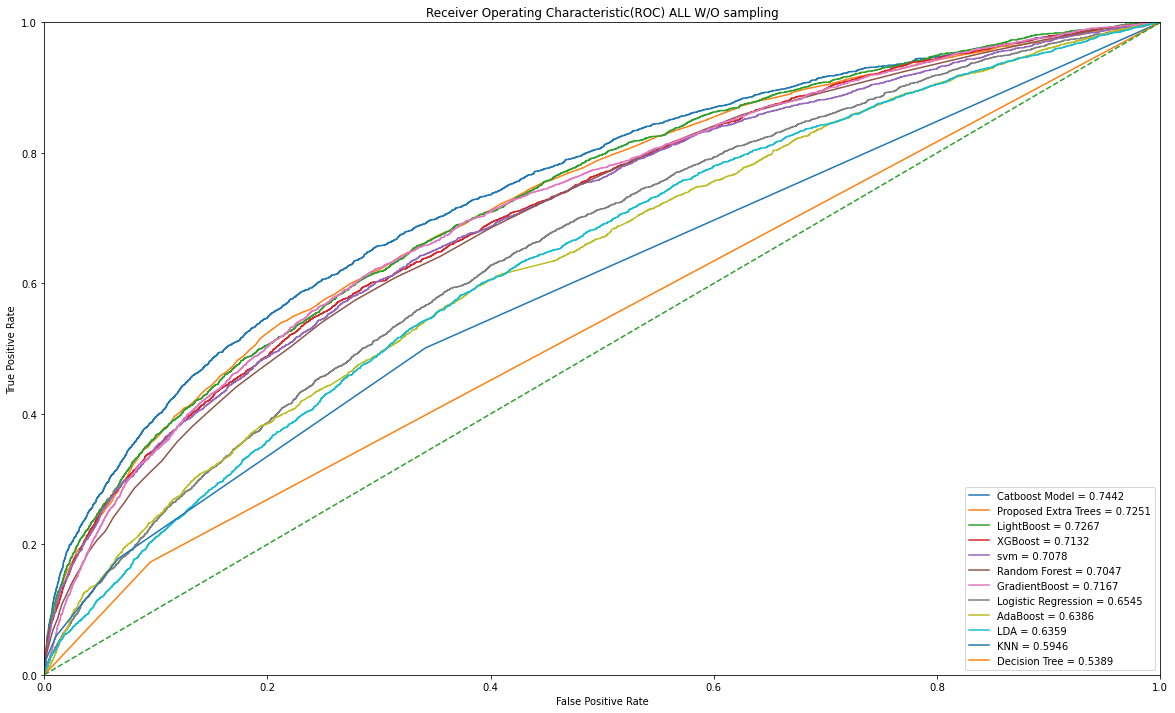

<Figure size 1440x1440 with 0 Axes>

In [75]:
plt.figure(figsize=(20,12))
plt.title("Receiver Operating Characteristic(ROC) ALL W/O sampling")

plt.plot(fpr_opn,tpr_opn,label="Catboost Model = %0.4f" %roc_auc_opn)
plt.plot(fpr_exn,tpr_exn,label="Proposed Extra Trees = %0.4f" %roc_auc_exn)
plt.plot(fpr_ln,tpr_ln,label="LightBoost = %0.4f" %roc_auc_ln)


plt.plot(fpr_xbgn,tpr_xbgn,label="XGBoost = %0.4f" %roc_auc_xbgn)
plt.plot(fpr_svm_n,tpr_svm_n,label="svm = %0.4f" %roc_auc_svm_n)
plt.plot(fpr_rfn,tpr_rfn,label="Random Forest = %0.4f" %roc_auc_rfn)
plt.plot(fpr_gn,tpr_gn,label="GradientBoost = %0.4f" %roc_auc_gn)
plt.plot(fpr_regress_n,tpr_regress_n,label="Logistic Regression = %0.4f" %roc_auc_regress_n)
plt.plot(fpr_adan,tpr_adan,label="AdaBoost = %0.4f" %roc_auc_adan)
plt.plot(fpr_ldan,tpr_ldan,label="LDA = %0.4f" %roc_auc_ldan)
plt.plot(fpr_knn,tpr_knn,label="KNN = %0.4f" %roc_auc_knn)
plt.plot(fpr_dtn,tpr_dtn,label="Decision Tree = %0.4f" %roc_auc_dtn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

## plotting for thesis

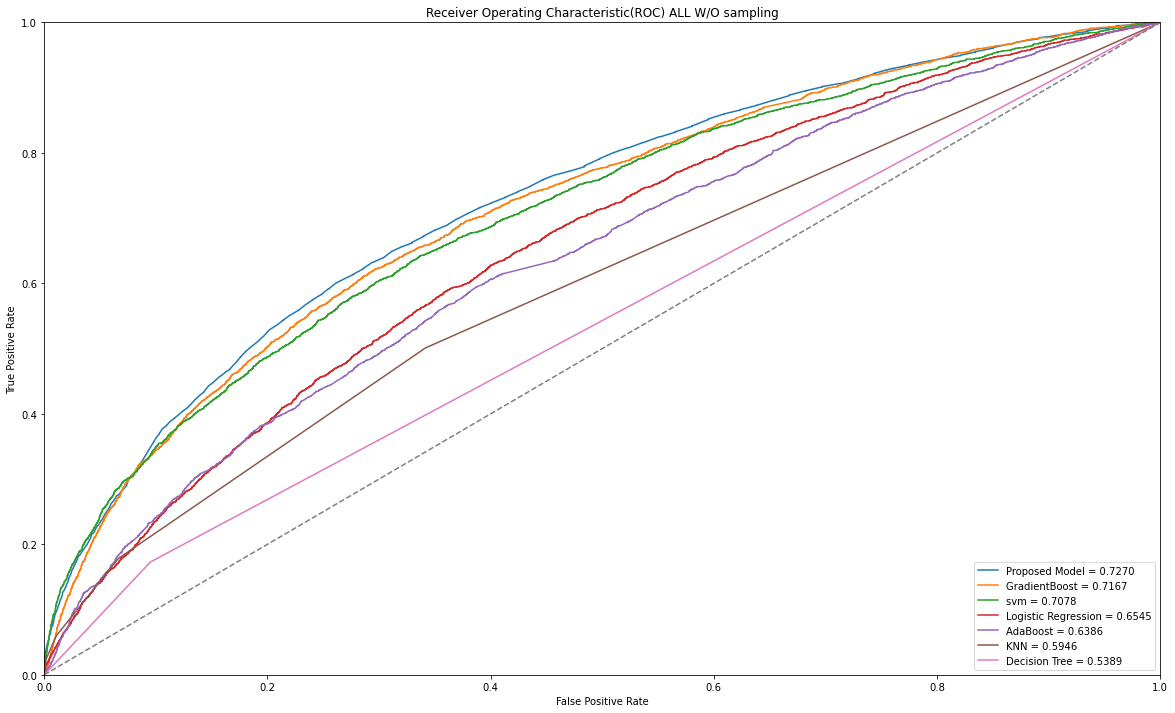

<Figure size 1440x1440 with 0 Axes>

In [232]:
plt.figure(figsize=(20,12))
plt.title("Receiver Operating Characteristic(ROC) ALL W/O sampling")


plt.plot(fpr_exn,tpr_exn,label="Proposed Model = %0.4f" %roc_auc_exn)
plt.plot(fpr_gn,tpr_gn,label="GradientBoost = %0.4f" %roc_auc_gn)
plt.plot(fpr_svm_n,tpr_svm_n,label="svm = %0.4f" %roc_auc_svm_n)
plt.plot(fpr_regress_n,tpr_regress_n,label="Logistic Regression = %0.4f" %roc_auc_regress_n)
plt.plot(fpr_adan,tpr_adan,label="AdaBoost = %0.4f" %roc_auc_adan)
plt.plot(fpr_knn,tpr_knn,label="KNN = %0.4f" %roc_auc_knn)
plt.plot(fpr_dtn,tpr_dtn,label="Decision Tree = %0.4f" %roc_auc_dtn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

## Over_sampling 100% SMOTeTEmek

In [ ]:
smote_k = SMOTETomek(sampling_strategy=1,random_state=0,n_jobs=-1)
smotek_train,smotek_y_train = smote_k.fit_resample(X,y)

In [ ]:
sns.countplot(x= smotek_y_train)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(smotek_train,smotek_y_train, train_size=0.2)

In [24]:
model_opcat_tst_new = CatBoostClassifier(max_depth=10,n_estimators=100,verbose=0,task_type="GPU")
model_opcat_tst_new.fit(x_train,y_train)
y_opcat_norm_tst_new = model_opcat_tst_new.predict(x_test)
print(classification_report(y_test,y_opcat_norm_tst_new))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     29268
           1       0.86      0.89      0.87     29414

    accuracy                           0.87     58682
   macro avg       0.87      0.87      0.87     58682
weighted avg       0.87      0.87      0.87     58682



## Over_sampling 100% SMOTENN

In [81]:
smote_enn = SMOTEENN(sampling_strategy=1,random_state=0,n_jobs=-1)
smotenn_x_train,smotenn_y_train = smote_enn.fit_resample(X,y)

In [82]:
x_train,x_test,y_train,y_test = train_test_split(smotenn_x_train,smotenn_y_train, train_size=0.2)

<AxesSubplot:ylabel='count'>

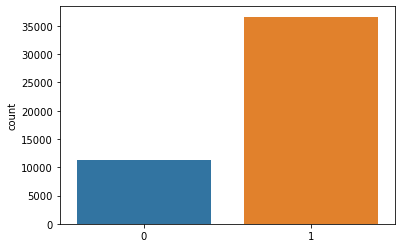

In [83]:
sns.countplot(x= smotenn_y_train)

In [29]:
model_opcat_tst_new = CatBoostClassifier(verbose=0,task_type="GPU")
model_opcat_tst_new.fit(x_train,y_train)
y_opcat_norm_tst_new = model_opcat_tst_new.predict(x_test)
print(classification_report(y_test,y_opcat_norm_tst_new))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      8958
           1       0.90      0.98      0.94     29314

    accuracy                           0.90     38272
   macro avg       0.90      0.82      0.85     38272
weighted avg       0.90      0.90      0.90     38272



In [84]:
model_extra_op.fit(x_train,y_train)
y_extra_tst = model_extra_op.predict(x_test)
print(classification_report(y_test,y_extra_tst))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76      8933
           1       0.90      0.99      0.94     29339

    accuracy                           0.91     38272
   macro avg       0.92      0.82      0.85     38272
weighted avg       0.91      0.91      0.90     38272



## Over_sampling 100% SMOTE

In [79]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=1,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train, train_size=0.2)

In [81]:
print(f"the total amount of people: {len(over_y_train)}")
print(f"theft flagged :{sum(over_y_train)}")
print(f"total no of normal customers: {len(over_y_train)-sum(over_y_train)}")

the total amount of people: 73354
theft flagged :36677
total no of normal customers: 36677


<AxesSubplot:ylabel='count'>

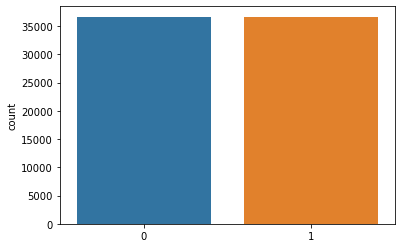

In [82]:
sns.countplot(x= over_y_train)

light_boosting_smote

In [83]:
model_light.fit(x_train,y_train)
y_pred_light_ov = model_light.predict(x_test)
print(classification_report(y_test,y_pred_light_ov))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     29364
           1       0.86      0.88      0.87     29320

    accuracy                           0.87     58684
   macro avg       0.87      0.87      0.87     58684
weighted avg       0.87      0.87      0.87     58684



In [84]:
matthews_corrcoef(y_test,y_pred_light_ov)

0.7362213462991283

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Light Boost Classifier, SMOTE Sampling
[[25287  4077]
 [ 3665 25655]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Light Boost Classifier, SMOTE Sampling
[[0.86115652 0.13884348]
 [0.125      0.875     ]]


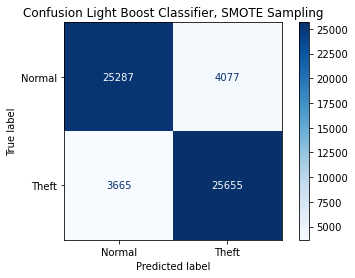

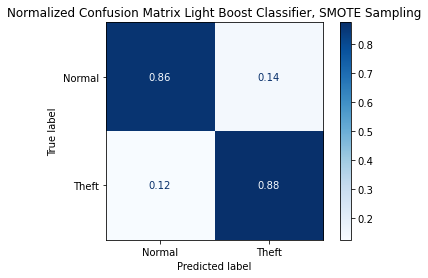

In [85]:
#plotting non-normalized confusion matrix

titles = [("Confusion Light Boost Classifier, SMOTE Sampling",None),
         ("Normalized Confusion Matrix Light Boost Classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_light,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [86]:
probs_light_ov = model_light.predict_proba(x_test)
preds_light_ov = probs_light_ov[:,1]
fpr_light_ov,tpr_light_ov,thresold = roc_curve(y_test,preds_light_ov)
roc_auc_light_ov = auc(fpr_light_ov,tpr_light_ov)

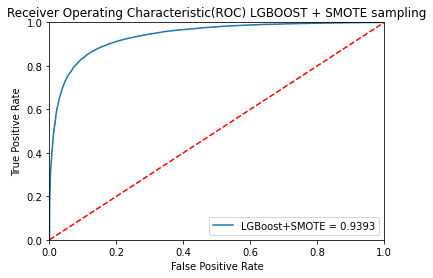

In [87]:
plt.title("Receiver Operating Characteristic(ROC) LGBOOST + SMOTE sampling")
plt.plot(fpr_light_ov,tpr_light_ov,label="LGBoost+SMOTE = %0.4f" %roc_auc_light_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Extra_trees_smote

In [88]:
model_extra_op.fit(x_train,y_train)
y_pred_et_ov = model_extra_op.predict(x_test)
print(classification_report(y_test,y_pred_et_ov))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     29364
           1       0.91      0.90      0.91     29320

    accuracy                           0.91     58684
   macro avg       0.91      0.91      0.91     58684
weighted avg       0.91      0.91      0.91     58684



In [89]:
matthews_corrcoef(y_test,y_pred_et_ov)

0.8117294759120008

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Proposed Extra Trees Classifier, SMOTE Sampling
[[26722  2642]
 [ 2883 26437]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion ProposedExtra Tress Classifier, SMOTE Sampling
[[0.91002588 0.08997412]
 [0.09832879 0.90167121]]


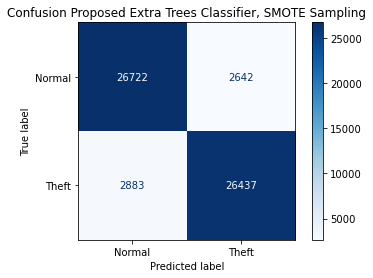

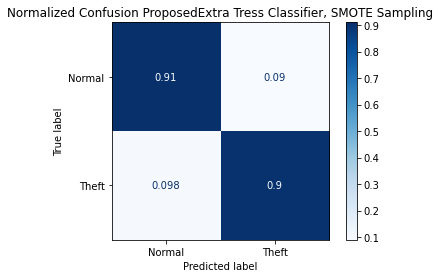

In [90]:
#plotting non-normalized confusion matrix

titles = [("Confusion Proposed Extra Trees Classifier, SMOTE Sampling",None),
         ("Normalized Confusion ProposedExtra Tress Classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_extra_op,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [91]:
probs_et_ov = model_extra_op.predict_proba(x_test)
preds_et_ov = probs_et_ov[:,1]
fpr_et_ov,tpr_et_ov,thresold = roc_curve(y_test,preds_et_ov)
roc_auc_et_ov = auc(fpr_et_ov,tpr_et_ov)

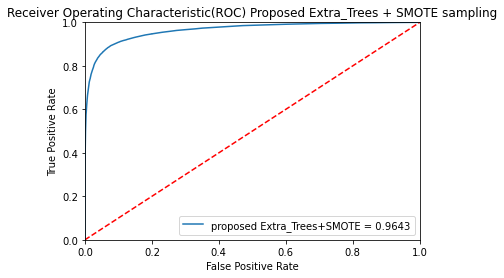

In [92]:
plt.title("Receiver Operating Characteristic(ROC) Proposed Extra_Trees + SMOTE sampling")
plt.plot(fpr_et_ov,tpr_et_ov,label="proposed Extra_Trees+SMOTE = %0.4f" %roc_auc_et_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

XGBoost SMOTE

In [93]:
model_Xgboost.fit(x_train,y_train)
y_pred_xgb_ov = model_Xgboost.predict(x_test)
print(classification_report(y_test,y_pred_xgb_ov))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:37:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     29364
           1       0.85      0.89      0.87     29320

    accuracy                           0.87     58684
   macro avg       0.87      0.87      0.87     58684
weighted avg       0.87      0.87      0.87     58684



In [94]:
matthews_corrcoef(y_test,y_pred_xgb_ov)

0.7382776305412532

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion XGBOOST Classifier, SMOTE Sampling
[[24929  4435]
 [ 3262 26058]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion XGBOOST Classifier, SMOTE Sampling
[[0.84896472 0.15103528]
 [0.11125512 0.88874488]]


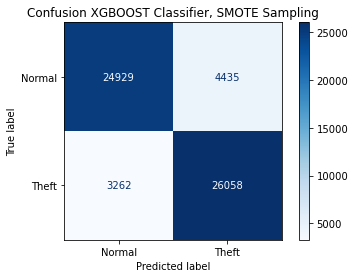

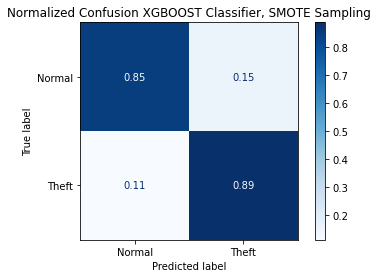

In [95]:
#plotting non-normalized confusion matrix

titles = [("Confusion XGBOOST Classifier, SMOTE Sampling",None),
         ("Normalized Confusion XGBOOST Classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_Xgboost,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [96]:
probs_xgb_ov = model_Xgboost.predict_proba(x_test)
preds_xgb_ov = probs_xgb_ov[:,1]
fpr_xgb_ov,tpr_xgb_ov,thresold = roc_curve(y_test,preds_xgb_ov)
roc_auc_xgb_ov = auc(fpr_xgb_ov,tpr_xgb_ov)

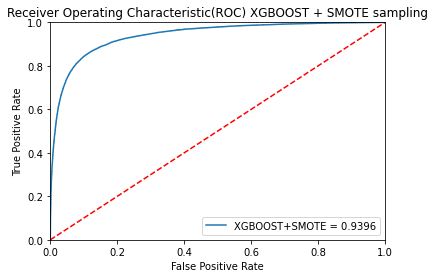

In [97]:
plt.title("Receiver Operating Characteristic(ROC) XGBOOST + SMOTE sampling")
plt.plot(fpr_xgb_ov,tpr_xgb_ov,label="XGBOOST+SMOTE = %0.4f" %roc_auc_xgb_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Gradient_boost_SMOTE

In [98]:
model_grad.fit(x_train,y_train)
y_pred_gb_ov = model_grad.predict(x_test)
print(classification_report(y_test,y_pred_gb_ov))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     29364
           1       0.77      0.81      0.79     29320

    accuracy                           0.78     58684
   macro avg       0.78      0.78      0.78     58684
weighted avg       0.78      0.78      0.78     58684



In [99]:
matthews_corrcoef(y_test,y_pred_gb_ov)

0.5630437758391111

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Gradient BOOST Classifier, SMOTE Sampling
[[22081  7283]
 [ 5567 23753]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Gradient BOOST Classifier, SMOTE Sampling
[[0.75197521 0.24802479]
 [0.1898704  0.8101296 ]]


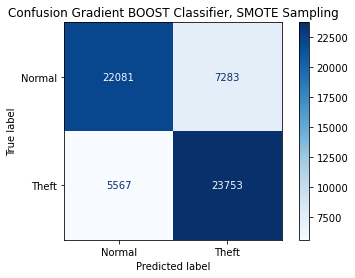

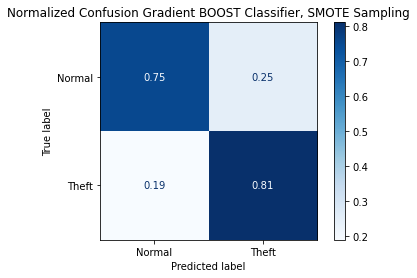

In [100]:
#plotting non-normalized confusion matrix

titles = [("Confusion Gradient BOOST Classifier, SMOTE Sampling",None),
         ("Normalized Confusion Gradient BOOST Classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grad,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [101]:
probs_gb_ov = model_grad.predict_proba(x_test)
preds_gb_ov = probs_gb_ov[:,1]
fpr_gb_ov,tpr_gb_ov,thresold = roc_curve(y_test,preds_gb_ov)
roc_auc_gb_ov = auc(fpr_gb_ov,tpr_gb_ov)

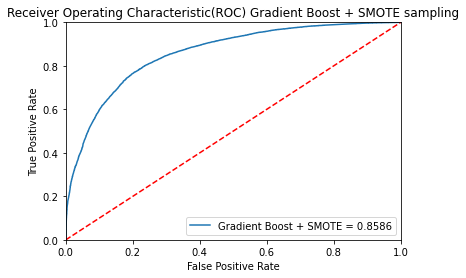

In [102]:
plt.title("Receiver Operating Characteristic(ROC) Gradient Boost + SMOTE sampling")
plt.plot(fpr_gb_ov,tpr_gb_ov,label="Gradient Boost + SMOTE = %0.4f" %roc_auc_gb_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

AdaBoost_SMOTE

In [103]:
model_ada.fit(x_train,y_train)
y_pred_ada_ov = model_ada.predict(x_test)
print(classification_report(y_test,y_pred_ada_ov))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72     29364
           1       0.72      0.75      0.74     29320

    accuracy                           0.73     58684
   macro avg       0.73      0.73      0.73     58684
weighted avg       0.73      0.73      0.73     58684



In [104]:
matthews_corrcoef(y_test,y_pred_ada_ov)

0.4600035213305381

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion AdaBOOST Classifier, SMOTE Sampling
[[20769  8595]
 [ 7264 22056]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Gradient AdaClassifier, SMOTE Sampling
[[0.70729465 0.29270535]
 [0.24774898 0.75225102]]


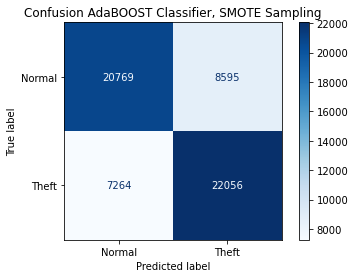

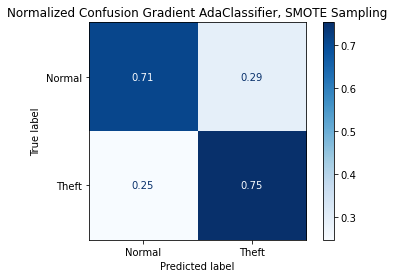

In [105]:
#plotting non-normalized confusion matrix

titles = [("Confusion AdaBOOST Classifier, SMOTE Sampling",None),
         ("Normalized Confusion Gradient AdaClassifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [106]:
probs_ada_ov = model_ada.predict_proba(x_test)
preds_ada_ov = probs_ada_ov[:,1]
fpr_ada_ov,tpr_ada_ov,thresold = roc_curve(y_test,preds_ada_ov)
roc_auc_ada_ov = auc(fpr_ada_ov,tpr_ada_ov)

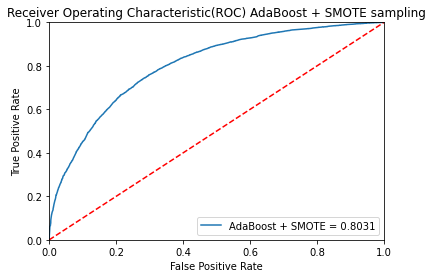

In [107]:
plt.title("Receiver Operating Characteristic(ROC) AdaBoost + SMOTE sampling")
plt.plot(fpr_ada_ov,tpr_ada_ov,label="AdaBoost + SMOTE = %0.4f" %roc_auc_ada_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Random forest SMOTE

In [108]:
model_rf.fit(x_train,y_train)
y_pred_rf_ov = model_rf.predict(x_test)
print(classification_report(y_test,y_pred_rf_ov))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     29364
           1       0.88      0.87      0.88     29320

    accuracy                           0.88     58684
   macro avg       0.88      0.88      0.88     58684
weighted avg       0.88      0.88      0.88     58684



In [109]:
matthews_corrcoef(y_test,y_pred_rf_ov)

0.7558574975216031

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Random Forest, SMOTE Sampling
[[26040  3324]
 [ 3843 25477]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Randome Forest, SMOTE Sampling
[[0.88680016 0.11319984]
 [0.13107094 0.86892906]]


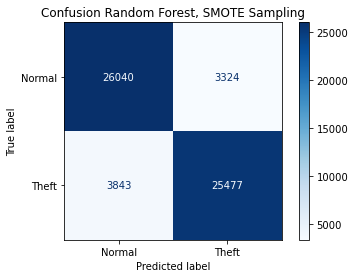

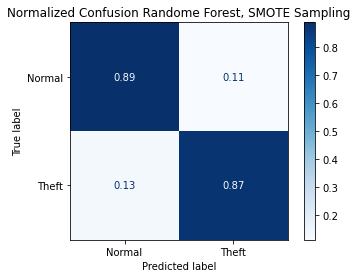

In [110]:
#plotting non-normalized confusion matrix

titles = [("Confusion Random Forest, SMOTE Sampling",None),
         ("Normalized Confusion Randome Forest, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rf,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [111]:
probs_rf_ov = model_rf.predict_proba(x_test)
preds_rf_ov = probs_rf_ov[:,1]
fpr_rf_ov,tpr_rf_ov,thresold = roc_curve(y_test,preds_rf_ov)
roc_auc_rf_ov = auc(fpr_rf_ov,tpr_rf_ov)

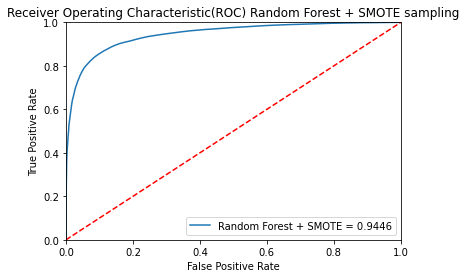

In [112]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest + SMOTE sampling")
plt.plot(fpr_rf_ov,tpr_rf_ov,label="Random Forest + SMOTE = %0.4f" %roc_auc_rf_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

proposed model SMOTE

In [113]:
model_cat.fit(x_train,y_train)
y_pred_opcat_ov = model_cat.predict(x_test)
print(classification_report(y_test,y_pred_opcat_ov)) 


              precision    recall  f1-score   support

           0       0.88      0.85      0.87     29364
           1       0.86      0.88      0.87     29320

    accuracy                           0.87     58684
   macro avg       0.87      0.87      0.87     58684
weighted avg       0.87      0.87      0.87     58684



In [114]:
matthews_corrcoef(y_test,y_pred_opcat_ov)

0.7382175480916062

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix CatBoost Model, SMOTE Sampling
[[25059  4305]
 [ 3387 25933]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Maatrix CatBoost Model, SMOTE Sampling
[[0.85339191 0.14660809]
 [0.11551842 0.88448158]]


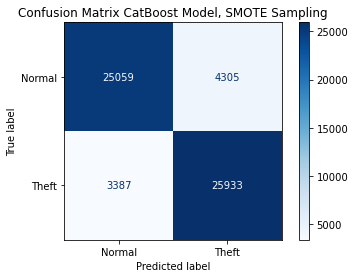

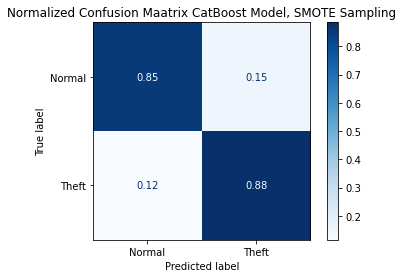

In [115]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix CatBoost Model, SMOTE Sampling",None),
         ("Normalized Confusion Maatrix CatBoost Model, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_cat,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [116]:
probs_opcat_ov = model_cat.predict_proba(x_test)
preds_opcat_ov = probs_opcat_ov[:,1]
fpr_opcat_ov,tpr_opcat_ov,thresold = roc_curve(y_test,preds_opcat_ov)
roc_auc_opcat_ov = auc(fpr_opcat_ov,tpr_opcat_ov)

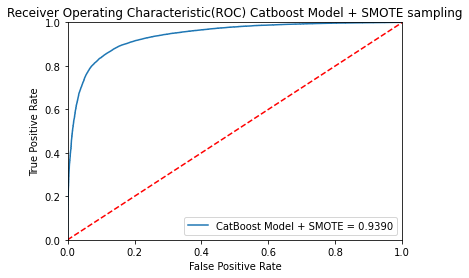

In [117]:
plt.title("Receiver Operating Characteristic(ROC) Catboost Model + SMOTE sampling")
plt.plot(fpr_opcat_ov,tpr_opcat_ov,label="CatBoost Model + SMOTE = %0.4f" %roc_auc_opcat_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## proposed_ test 


In [14]:
model_opcat_tst.fit(x_train,y_train)
y_pred_opcat_ov_tst = model_opcat_tst.predict(x_test)
print(classification_report(y_test,y_pred_opcat_ov_tst))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     29206
           1       0.85      0.89      0.87     29478

    accuracy                           0.87     58684
   macro avg       0.87      0.87      0.87     58684
weighted avg       0.87      0.87      0.87     58684



In [15]:
matthews_corrcoef(y_test,y_pred_opcat_ov_tst)

0.7347499294875927

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Proposed Model, SMOTE Sampling
[[24613  4593]
 [ 3212 26266]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Proposed Model, SMOTE Sampling
[[0.84273779 0.15726221]
 [0.10896262 0.89103738]]


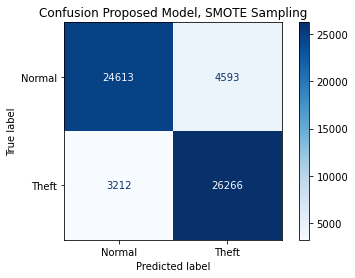

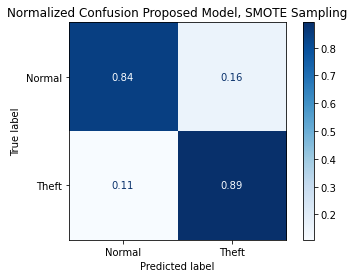

In [16]:
#plotting non-normalized confusion matrix

titles = [("Confusion Proposed Model, SMOTE Sampling",None),
         ("Normalized Confusion Proposed Model, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_opcat_tst,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [17]:
probs_opcat_ov_tst = model_opcat_tst.predict_proba(x_test)
preds_opcat_ov_tst = probs_opcat_ov_tst[:,1]
fpr_opcat_ov_tst,tpr_opcat_ov_tst,thresold = roc_curve(y_test,preds_opcat_ov_tst)
roc_auc_opcat_ov_tst = auc(fpr_opcat_ov_tst,tpr_opcat_ov_tst)

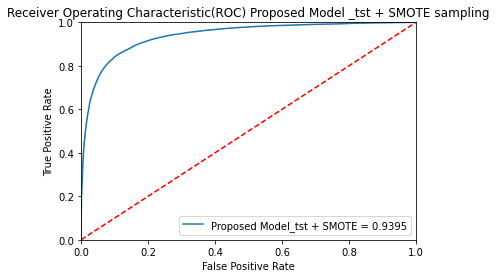

In [18]:
plt.title("Receiver Operating Characteristic(ROC) Proposed Model _tst + SMOTE sampling")
plt.plot(fpr_opcat_ov_tst,tpr_opcat_ov_tst,label="Proposed Model_tst + SMOTE = %0.4f" %roc_auc_opcat_ov_tst)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [119]:
#plotting ensemble SMOTE

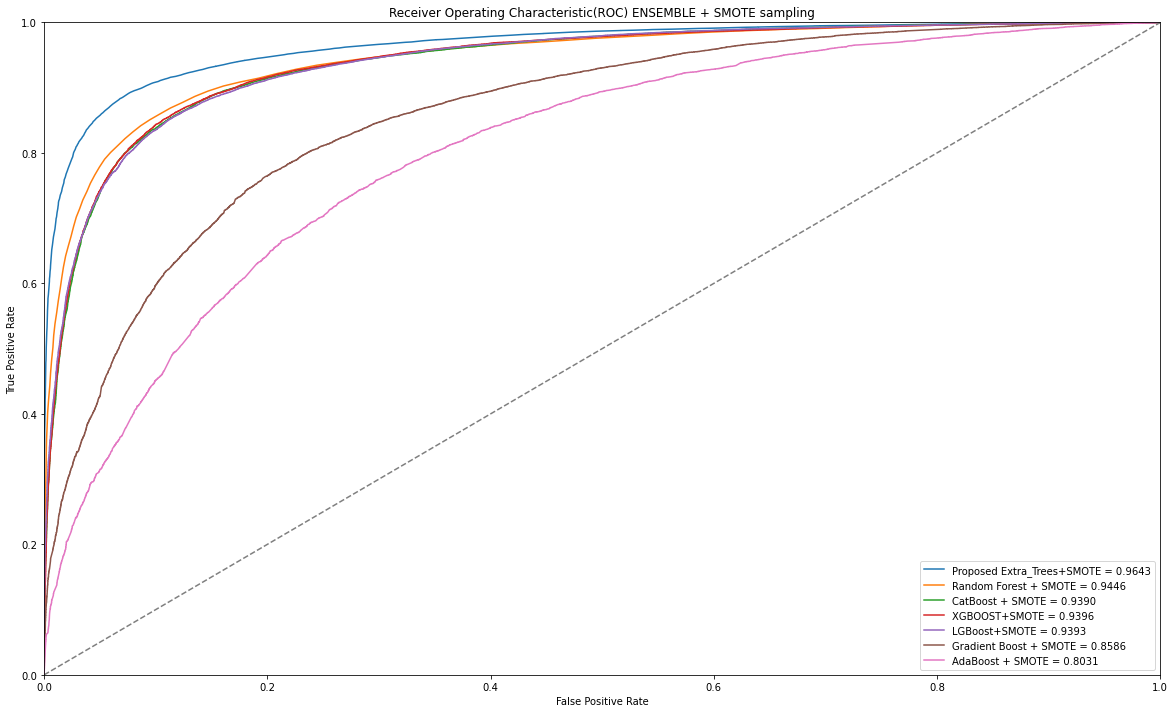

<Figure size 1440x1440 with 0 Axes>

In [120]:
#plotting ensemble SMOTE
plt.figure(figsize=(20,12))
plt.plot(fpr_et_ov,tpr_et_ov,label="Proposed Extra_Trees+SMOTE = %0.4f" %roc_auc_et_ov)

plt.title("Receiver Operating Characteristic(ROC) ENSEMBLE + SMOTE sampling")

plt.plot(fpr_rf_ov,tpr_rf_ov,label="Random Forest + SMOTE = %0.4f" %roc_auc_rf_ov)
plt.plot(fpr_opcat_ov,tpr_opcat_ov,label="CatBoost + SMOTE = %0.4f" %roc_auc_opcat_ov)
plt.plot(fpr_xgb_ov,tpr_xgb_ov,label="XGBOOST+SMOTE = %0.4f" %roc_auc_xgb_ov)
plt.plot(fpr_light_ov,tpr_light_ov,label="LGBoost+SMOTE = %0.4f" %roc_auc_light_ov)
plt.plot(fpr_gb_ov,tpr_gb_ov,label="Gradient Boost + SMOTE = %0.4f" %roc_auc_gb_ov)
plt.plot(fpr_ada_ov,tpr_ada_ov,label="AdaBoost + SMOTE = %0.4f" %roc_auc_ada_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

SVM classifier for SMOTE

In [121]:
model_svm.fit(x_train,y_train)
y_pred_svm_ov= model_svm.predict(x_test)
print(classification_report(y_test,y_pred_svm_ov))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80     29364
           1       0.79      0.84      0.81     29320

    accuracy                           0.81     58684
   macro avg       0.81      0.81      0.81     58684
weighted avg       0.81      0.81      0.81     58684



In [122]:
matthews_corrcoef(y_test,y_pred_svm_ov)

0.6175885592724768

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion SVM classifier, SMOTE Sampling
[[22643  6721]
 [ 4550 24770]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion SVM classifier, SMOTE Sampling
[[0.77111429 0.22888571]
 [0.15518417 0.84481583]]


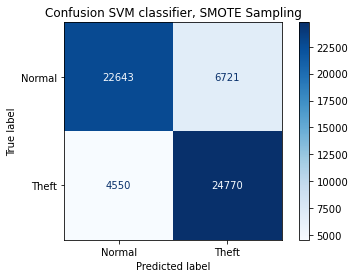

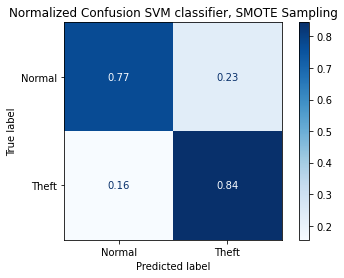

In [123]:
#plotting non-normalized confusion matrix

titles = [("Confusion SVM classifier, SMOTE Sampling",None),
         ("Normalized Confusion SVM classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_svm,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [124]:
probs_svm_ov = model_svm.predict_proba(x_test)
preds_svm_ov = probs_svm_ov[:,1]
fpr_svm_ov,tpr_svm_ov,thresold = roc_curve(y_test,preds_svm_ov)
roc_auc_svm_ov = auc(fpr_svm_ov,tpr_svm_ov)

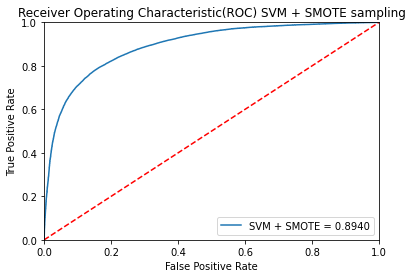

In [125]:
plt.title("Receiver Operating Characteristic(ROC) SVM + SMOTE sampling")
plt.plot(fpr_svm_ov,tpr_svm_ov,label="SVM + SMOTE = %0.4f" %roc_auc_svm_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Decision Tree +SMOTE

In [126]:
model_dt.fit(x_train,y_train)
y_pred_dt_ov = model_dt.predict(x_test)
print(classification_report(y_test,y_pred_dt_ov))


              precision    recall  f1-score   support

           0       0.79      0.73      0.76     29364
           1       0.75      0.80      0.77     29320

    accuracy                           0.76     58684
   macro avg       0.77      0.76      0.76     58684
weighted avg       0.77      0.76      0.76     58684



In [127]:
matthews_corrcoef(y_test,y_pred_dt_ov)

0.5300191592606176

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Decision Tree classifier, SMOTE Sampling
[[21343  8021]
 [ 5814 23506]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Decision Tree classifier, SMOTE Sampling
[[0.72684239 0.27315761]
 [0.19829468 0.80170532]]


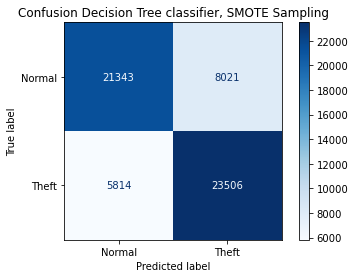

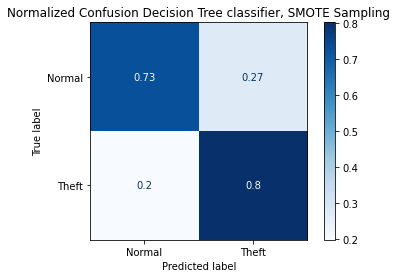

In [128]:
#plotting non-normalized confusion matrix

titles = [("Confusion Decision Tree classifier, SMOTE Sampling",None),
         ("Normalized Confusion Decision Tree classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_dt,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [129]:
probs_dt_ov = model_dt.predict_proba(x_test)
preds_dt_ov = probs_dt_ov[:,1]
fpr_dt_ov,tpr_dt_ov,thresold = roc_curve(y_test,preds_dt_ov)
roc_auc_dt_ov = auc(fpr_dt_ov,tpr_dt_ov)

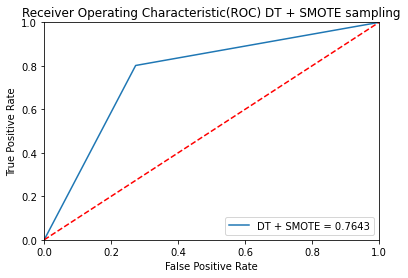

In [130]:
plt.title("Receiver Operating Characteristic(ROC) DT + SMOTE sampling")
plt.plot(fpr_dt_ov,tpr_dt_ov,label="DT + SMOTE = %0.4f" %roc_auc_dt_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Logistic Regression + SMOTE

In [131]:
model_regress.fit(x_train,y_train)
y_pred_lgre_ov = model_regress.predict(x_test)
print(classification_report(y_test,y_pred_lgre_ov))


              precision    recall  f1-score   support

           0       0.72      0.64      0.68     29364
           1       0.68      0.75      0.71     29320

    accuracy                           0.70     58684
   macro avg       0.70      0.70      0.70     58684
weighted avg       0.70      0.70      0.70     58684



In [132]:
matthews_corrcoef(y_test,y_pred_lgre_ov)

0.40067785505113324

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion logistic Regression classifier, SMOTE Sampling
[[18899 10465]
 [ 7195 22125]]
Normalized Confusion Logistic Regression classifier, SMOTE Sampling
[[0.64361122 0.35638878]
 [0.24539563 0.75460437]]


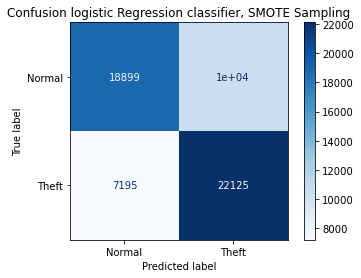

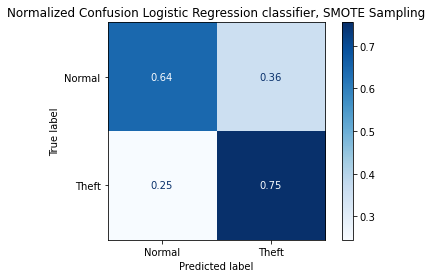

In [133]:
#plotting non-normalized confusion matrix

titles = [("Confusion logistic Regression classifier, SMOTE Sampling",None),
         ("Normalized Confusion Logistic Regression classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_regress,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [134]:
probs_lgre_ov = model_regress.predict_proba(x_test)
preds_lgre_ov = probs_lgre_ov[:,1]
fpr_lgre_ov,tpr_lgre_ov,thresold = roc_curve(y_test,preds_lgre_ov)
roc_auc_lgre_ov = auc(fpr_lgre_ov,tpr_lgre_ov)

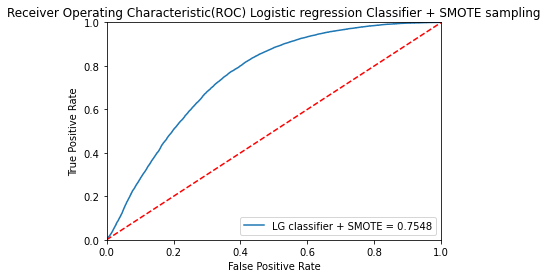

In [135]:
plt.title("Receiver Operating Characteristic(ROC) Logistic regression Classifier + SMOTE sampling")
plt.plot(fpr_lgre_ov,tpr_lgre_ov,label="LG classifier + SMOTE = %0.4f" %roc_auc_lgre_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

LDA + SMOTE

In [136]:
mod_lda.fit(x_train,y_train)
y_pred_lda_ov = mod_lda.predict(x_test)
print(classification_report(y_test,y_pred_lda_ov))

              precision    recall  f1-score   support

           0       0.73      0.62      0.68     29364
           1       0.67      0.77      0.72     29320

    accuracy                           0.70     58684
   macro avg       0.70      0.70      0.70     58684
weighted avg       0.70      0.70      0.70     58684



In [137]:
matthews_corrcoef(y_test,y_pred_lda_ov)

0.4035603264652066

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion LDA classifier, SMOTE Sampling
[[18342 11022]
 [ 6615 22705]]
Normalized Confusion LDA classifier, SMOTE Sampling
[[0.62464242 0.37535758]
 [0.22561392 0.77438608]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


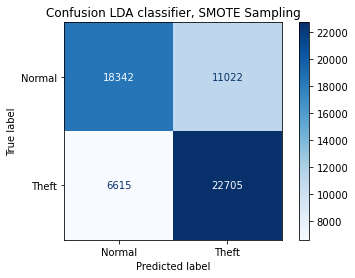

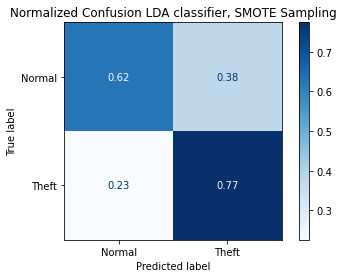

In [138]:
#plotting non-normalized confusion matrix

titles = [("Confusion LDA classifier, SMOTE Sampling",None),
         ("Normalized Confusion LDA classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(mod_lda,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [139]:
probs_lda_ov = mod_lda.predict_proba(x_test)
preds_lda_ov = probs_lda_ov[:,1]
fpr_lda_ov,tpr_lda_ov,thresold = roc_curve(y_test,preds_lda_ov)
roc_auc_lda_ov = auc(fpr_lda_ov,tpr_lda_ov)

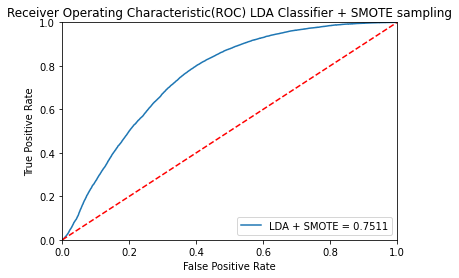

In [140]:
plt.title("Receiver Operating Characteristic(ROC) LDA Classifier + SMOTE sampling")
plt.plot(fpr_lda_ov,tpr_lda_ov,label="LDA + SMOTE = %0.4f" %roc_auc_lda_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

KNN classifier + SMOTE

In [141]:
model_knn.fit(x_train,y_train)
y_pred_knn_ov = model_knn.predict(x_test)
print(classification_report(y_test,y_pred_knn_ov))

              precision    recall  f1-score   support

           0       0.95      0.26      0.41     29364
           1       0.57      0.99      0.72     29320

    accuracy                           0.62     58684
   macro avg       0.76      0.62      0.56     58684
weighted avg       0.76      0.62      0.56     58684



In [142]:
matthews_corrcoef(y_test,y_pred_knn_ov)

0.35612419276274393

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion KNN Classifier, SMOTE Sampling
[[ 7614 21750]
 [  423 28897]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion KNN classifier, SMOTE Sampling
[[0.2592971  0.7407029 ]
 [0.01442701 0.98557299]]


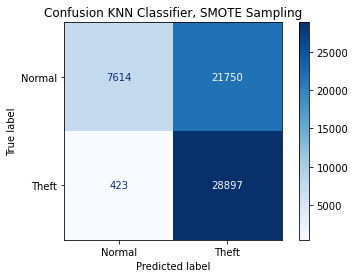

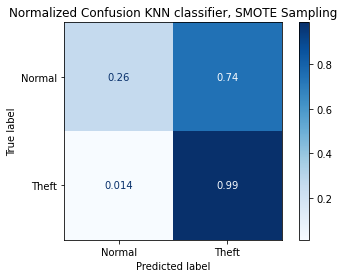

In [143]:
#plotting non-normalized confusion matrix

titles = [("Confusion KNN Classifier, SMOTE Sampling",None),
         ("Normalized Confusion KNN classifier, SMOTE Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_knn,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [144]:
probs_knn_ov = model_knn.predict_proba(x_test)
preds_knn_ov = probs_knn_ov[:,1]
fpr_knn_ov,tpr_knn_ov,thresold = roc_curve(y_test,preds_knn_ov)
roc_auc_knn_ov = auc(fpr_knn_ov,tpr_knn_ov)

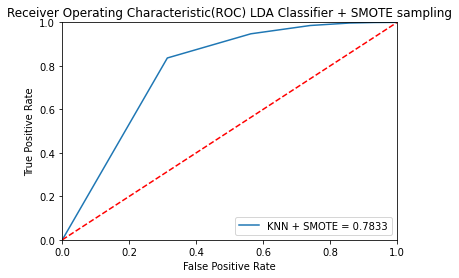

In [145]:
plt.title("Receiver Operating Characteristic(ROC) LDA Classifier + SMOTE sampling")
plt.plot(fpr_knn_ov,tpr_knn_ov,label="KNN + SMOTE = %0.4f" %roc_auc_knn_ov)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [146]:
#plotting all SMOTE

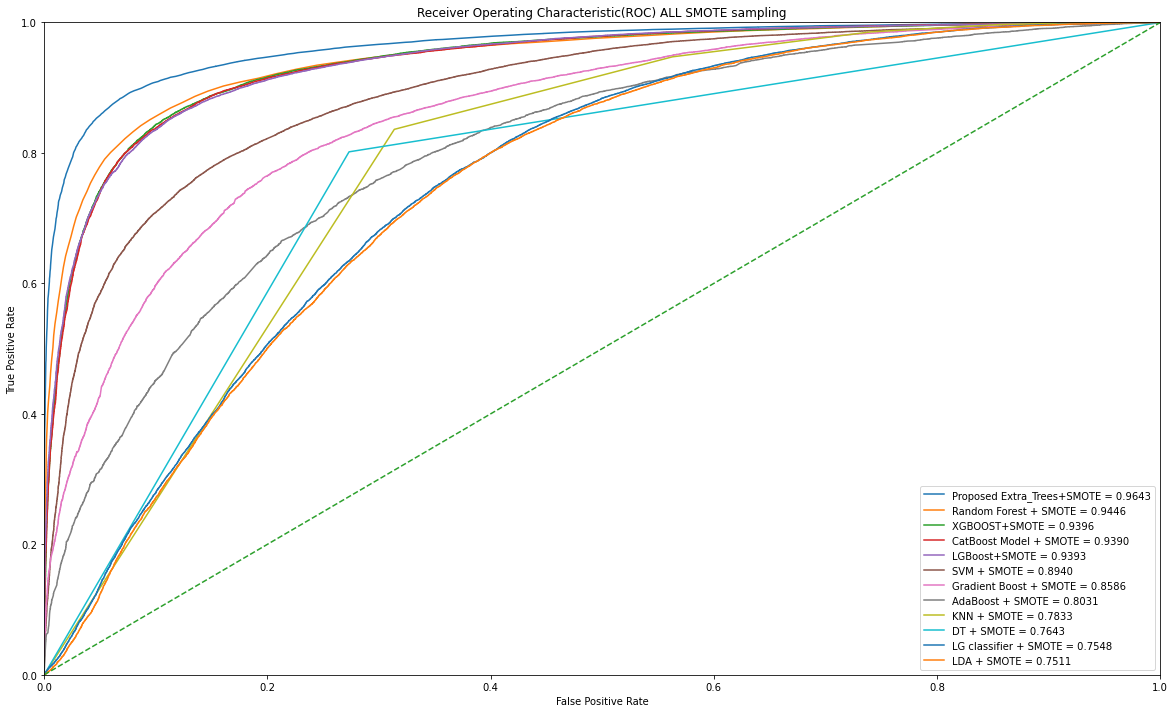

<Figure size 1440x1440 with 0 Axes>

In [147]:
#plotting all
plt.figure(figsize=(20,12))

plt.title("Receiver Operating Characteristic(ROC) ALL SMOTE sampling")
plt.plot(fpr_et_ov,tpr_et_ov,label="Proposed Extra_Trees+SMOTE = %0.4f" %roc_auc_et_ov)
plt.plot(fpr_rf_ov,tpr_rf_ov,label="Random Forest + SMOTE = %0.4f" %roc_auc_rf_ov)
plt.plot(fpr_xgb_ov,tpr_xgb_ov,label="XGBOOST+SMOTE = %0.4f" %roc_auc_xgb_ov)
plt.plot(fpr_opcat_ov,tpr_opcat_ov,label="CatBoost Model + SMOTE = %0.4f" %roc_auc_opcat_ov)
plt.plot(fpr_light_ov,tpr_light_ov,label="LGBoost+SMOTE = %0.4f" %roc_auc_light_ov)
plt.plot(fpr_svm_ov,tpr_svm_ov,label="SVM + SMOTE = %0.4f" %roc_auc_svm_ov)
plt.plot(fpr_gb_ov,tpr_gb_ov,label="Gradient Boost + SMOTE = %0.4f" %roc_auc_gb_ov)
plt.plot(fpr_ada_ov,tpr_ada_ov,label="AdaBoost + SMOTE = %0.4f" %roc_auc_ada_ov)
plt.plot(fpr_knn_ov,tpr_knn_ov,label="KNN + SMOTE = %0.4f" %roc_auc_knn_ov)
plt.plot(fpr_dt_ov,tpr_dt_ov,label="DT + SMOTE = %0.4f" %roc_auc_dt_ov)
plt.plot(fpr_lgre_ov,tpr_lgre_ov,label="LG classifier + SMOTE = %0.4f" %roc_auc_lgre_ov)
plt.plot(fpr_lda_ov,tpr_lda_ov,label="LDA + SMOTE = %0.4f" %roc_auc_lda_ov)

plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

# MODELS plus 100% Near-miss Undersampling

In [148]:
#oversampling of minority class (imbalanced learning)
near_under = NearMiss(sampling_strategy=1,n_jobs=-1)
near_x_train,near_y_train = near_under.fit_resample(X,y)

In [149]:
x_train,x_test,y_train,y_test = train_test_split(near_x_train,near_y_train,test_size=0.20)

In [150]:
print(f"the total amount of people: {len(near_y_train)}")
print(f"theft flagged :{sum(near_y_train)}")
print(f"total no of normal customers: {len(near_y_train)-sum(near_y_train)}")

the total amount of people: 7158
theft flagged :3579
total no of normal customers: 3579


<AxesSubplot:ylabel='count'>

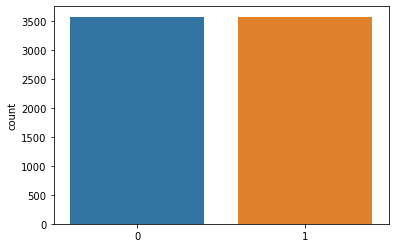

In [151]:
sns.countplot(x=near_y_train )

light boost + near miss

In [152]:
model_light.fit(x_train,y_train)
y_pred_light_un = model_light.predict(x_test)
print(classification_report(y_test,y_pred_light_un))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       684
           1       0.95      0.86      0.91       748

    accuracy                           0.91      1432
   macro avg       0.91      0.91      0.91      1432
weighted avg       0.91      0.91      0.91      1432



In [153]:
matthews_corrcoef(y_test,y_pred_light_un)

0.8184656337575017

Confusion LGBOOST Classifier, Near-miss Undersampling
[[652  32]
 [101 647]]
Normalized Confusion LGBOOST classifier, Near-miss Undersampling
[[0.95321637 0.04678363]
 [0.13502674 0.86497326]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


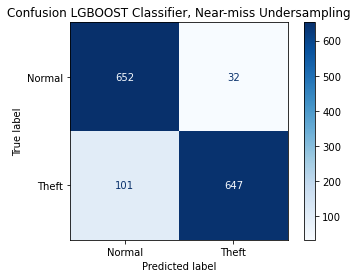

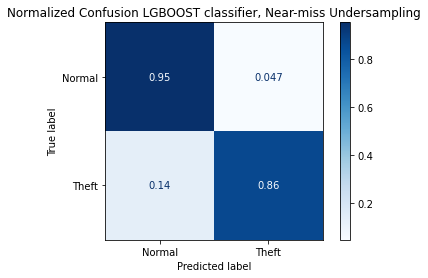

In [154]:
#plotting non-normalized confusion matrix

titles = [("Confusion LGBOOST Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion LGBOOST classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_light,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [155]:
probs_light_un = model_light.predict_proba(x_test)
preds_light_un = probs_light_un[:,1]
fpr_light_un,tpr_light_un,thresold = roc_curve(y_test,preds_light_un)
roc_auc_light_un = auc(fpr_light_un,tpr_light_un)

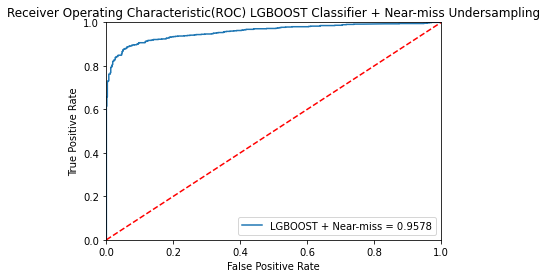

In [156]:
plt.title("Receiver Operating Characteristic(ROC) LGBOOST Classifier + Near-miss Undersampling")
plt.plot(fpr_light_un,tpr_light_un,label="LGBOOST + Near-miss = %0.4f" %roc_auc_light_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Extra Trees Clasifier+ Near-miss

In [157]:
model_extra_op.fit(x_train,y_train)
y_pred_et_un = model_extra_op.predict(x_test)
print(classification_report(y_test,y_pred_et_un))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       684
           1       0.96      0.85      0.90       748

    accuracy                           0.90      1432
   macro avg       0.91      0.91      0.90      1432
weighted avg       0.91      0.90      0.90      1432



In [158]:
matthews_corrcoef(y_test,y_pred_et_un)

0.8146844562188522

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix ProposedExtra Trees Classifier, Near-miss Undersampling
[[661  23]
 [115 633]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Proposed Extra Trees classifier, Near-miss Undersampling
[[0.96637427 0.03362573]
 [0.15374332 0.84625668]]


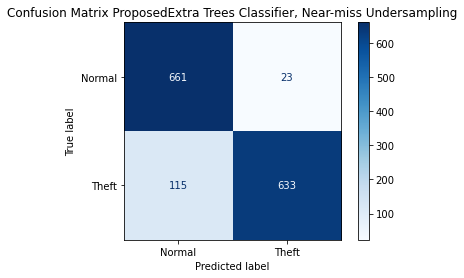

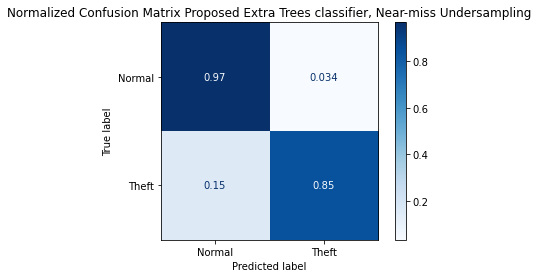

In [159]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix ProposedExtra Trees Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion Matrix Proposed Extra Trees classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_extra_op,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [160]:
probs_et_un = model_extra_op.predict_proba(x_test)
preds_et_un = probs_et_un[:,1]
fpr_et_un,tpr_et_un,thresold = roc_curve(y_test,preds_et_un)
roc_auc_et_un = auc(fpr_et_un,tpr_et_un)

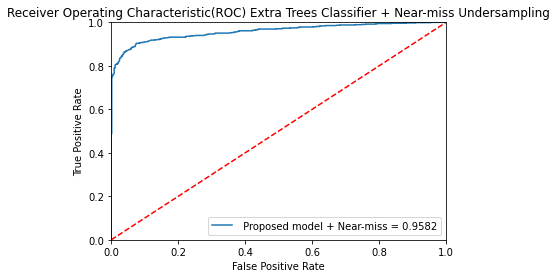

In [220]:
plt.title("Receiver Operating Characteristic(ROC) Extra Trees Classifier + Near-miss Undersampling")
plt.plot(fpr_et_un,tpr_et_un,label=" Proposed model + Near-miss = %0.4f" %roc_auc_et_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

XGBOOST Classifiier + Near-miss Undersampling

In [162]:
model_Xgboost.fit(x_train,y_train)
y_pred_xgb_un = model_Xgboost.predict(x_test)
print(classification_report(y_test,y_pred_xgb_un))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:41:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       684
           1       0.95      0.86      0.90       748

    accuracy                           0.91      1432
   macro avg       0.91      0.91      0.91      1432
weighted avg       0.91      0.91      0.91      1432



In [163]:
matthews_corrcoef(y_test,y_pred_xgb_un)

0.8146376335115033

Confusion XGBOOST Classifier, Near-miss Undersampling
[[652  32]
 [104 644]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion XGBOOST classifier, Near-miss Undersampling
[[0.95321637 0.04678363]
 [0.13903743 0.86096257]]


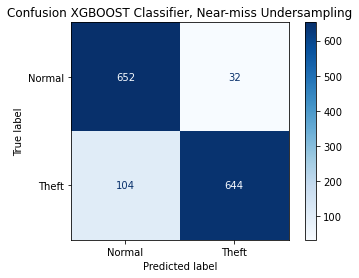

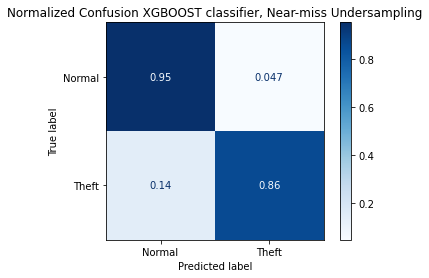

In [164]:
#plotting non-normalized confusion matrix

titles = [("Confusion XGBOOST Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion XGBOOST classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_Xgboost,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [165]:
probs_xgb_un = model_Xgboost.predict_proba(x_test)
preds_xgb_un = probs_xgb_un[:,1]
fpr_xgb_un,tpr_xgb_un,thresold = roc_curve(y_test,preds_xgb_un)
roc_auc_xgb_un = auc(fpr_xgb_un,tpr_xgb_un)

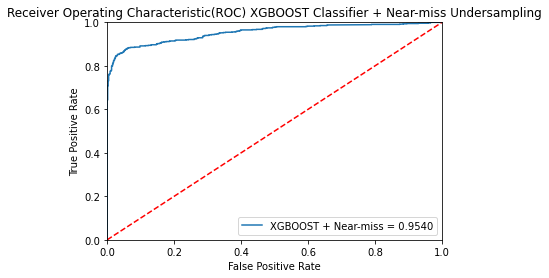

In [166]:
plt.title("Receiver Operating Characteristic(ROC) XGBOOST Classifier + Near-miss Undersampling")
plt.plot(fpr_xgb_un,tpr_xgb_un,label="XGBOOST + Near-miss = %0.4f" %roc_auc_xgb_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Gradient Boost + Near- miss Undersampling

In [167]:
model_grad.fit(x_train,y_train)
y_pred_gb_un = model_grad.predict(x_test)
print(classification_report(y_test,y_pred_gb_un))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       684
           1       0.95      0.81      0.88       748

    accuracy                           0.88      1432
   macro avg       0.89      0.88      0.88      1432
weighted avg       0.89      0.88      0.88      1432



In [168]:
matthews_corrcoef(y_test,y_pred_gb_un)

0.770861423075784

Confusion Gradient Boost Classifier, Near-miss Undersampling
[[652  32]
 [139 609]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Gradient Boost classifier, Near-miss Undersampling
[[0.95321637 0.04678363]
 [0.18582888 0.81417112]]


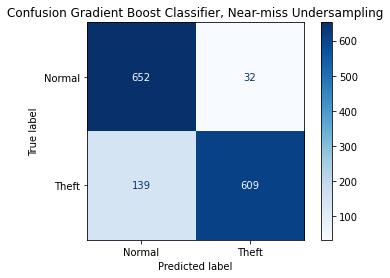

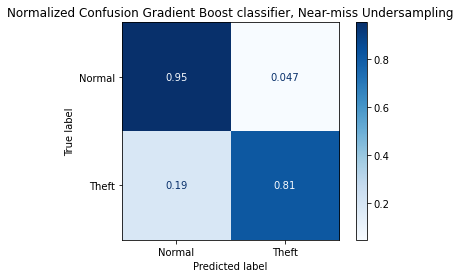

In [169]:
#plotting non-normalized confusion matrix

titles = [("Confusion Gradient Boost Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion Gradient Boost classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grad,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [170]:
probs_gb_un = model_grad.predict_proba(x_test)
preds_gb_un = probs_gb_un[:,1]
fpr_gb_un,tpr_gb_un,thresold = roc_curve(y_test,preds_gb_un)
roc_auc_gb_un = auc(fpr_gb_un,tpr_gb_un)

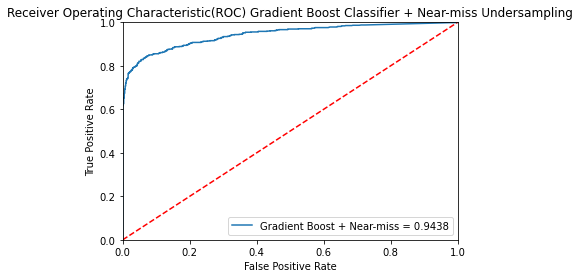

In [171]:
plt.title("Receiver Operating Characteristic(ROC) Gradient Boost Classifier + Near-miss Undersampling")
plt.plot(fpr_gb_un,tpr_gb_un,label="Gradient Boost + Near-miss = %0.4f" %roc_auc_gb_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

AdaBoost + Near-miss Undersampling

In [172]:
model_ada.fit(x_train,y_train)
y_pred_ada_un = model_ada.predict(x_test)
print(classification_report(y_test,y_pred_ada_un))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       684
           1       0.87      0.80      0.83       748

    accuracy                           0.83      1432
   macro avg       0.84      0.84      0.83      1432
weighted avg       0.84      0.83      0.83      1432



In [173]:
matthews_corrcoef(y_test,y_pred_ada_un)

0.6722308717581305

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion AdaBoost Classifier, Near-miss Undersampling
[[597  87]
 [150 598]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion AdaBoost classifier, Near-miss Undersampling
[[0.87280702 0.12719298]
 [0.20053476 0.79946524]]


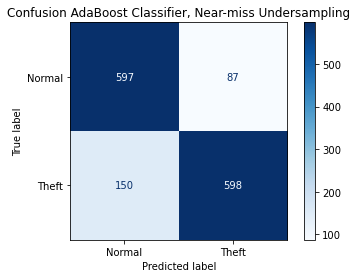

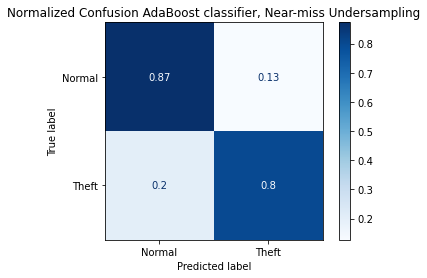

In [174]:
#plotting non-normalized confusion matrix

titles = [("Confusion AdaBoost Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion AdaBoost classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [175]:
probs_ada_un = model_ada.predict_proba(x_test)
preds_ada_un = probs_ada_un[:,1]
fpr_ada_un,tpr_ada_un,thresold = roc_curve(y_test,preds_ada_un)
roc_auc_ada_un = auc(fpr_ada_un,tpr_ada_un)

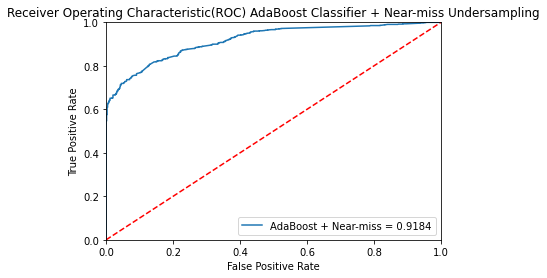

In [176]:
plt.title("Receiver Operating Characteristic(ROC) AdaBoost Classifier + Near-miss Undersampling")
plt.plot(fpr_ada_un,tpr_ada_un,label="AdaBoost + Near-miss = %0.4f" %roc_auc_ada_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Radom Forest Classifier + Near Miss Undersampling

In [177]:
model_rf.fit(x_train,y_train)
y_pred_rf_un = model_rf.predict(x_test)
print(classification_report(y_test,y_pred_rf_un))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       684
           1       0.96      0.86      0.90       748

    accuracy                           0.91      1432
   macro avg       0.91      0.91      0.91      1432
weighted avg       0.91      0.91      0.90      1432



In [178]:
matthews_corrcoef(y_test,y_pred_rf_un)

0.8154248753015397

Confusion Random Forest Classifier, Near-miss Undersampling
[[655  29]
 [107 641]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Random Forest classifier, Near-miss Undersampling
[[0.95760234 0.04239766]
 [0.14304813 0.85695187]]


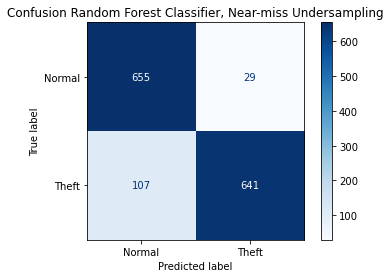

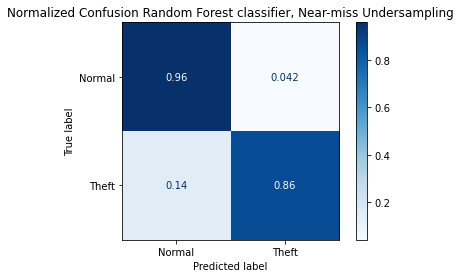

In [179]:
#plotting non-normalized confusion matrix

titles = [("Confusion Random Forest Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion Random Forest classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rf,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [180]:
probs_rf_un = model_rf.predict_proba(x_test)
preds_rf_un = probs_rf_un[:,1]
fpr_rf_un,tpr_rf_un,thresold = roc_curve(y_test,preds_rf_un)
roc_auc_rf_un = auc(fpr_rf_un,tpr_rf_un)

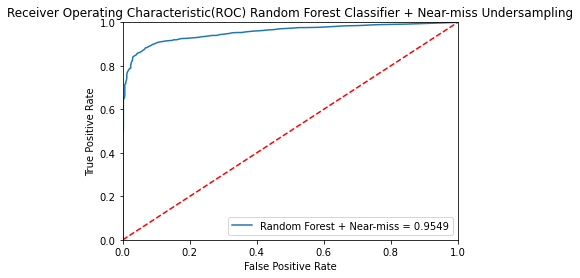

In [181]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest Classifier + Near-miss Undersampling")
plt.plot(fpr_rf_un,tpr_rf_un,label="Random Forest + Near-miss = %0.4f" %roc_auc_rf_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

CatBoost Model + Near-miss 

In [182]:
model_cat.fit(x_train,y_train)
y_pred_opcat_un = model_cat.predict(x_test)
print(classification_report(y_test,y_pred_opcat_un))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       684
           1       0.96      0.85      0.90       748

    accuracy                           0.91      1432
   macro avg       0.91      0.91      0.91      1432
weighted avg       0.91      0.91      0.91      1432



In [183]:
matthews_corrcoef(y_test,y_pred_opcat_un)

0.8175272808486774

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix CatBoost Model Classifier, Near-miss Undersampling
[[658  26]
 [109 639]]
Normalized Confusion Matrix CatBoost Model classifier, Near-miss Undersampling
[[0.9619883  0.0380117 ]
 [0.14572193 0.85427807]]


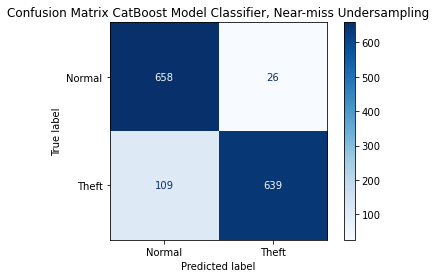

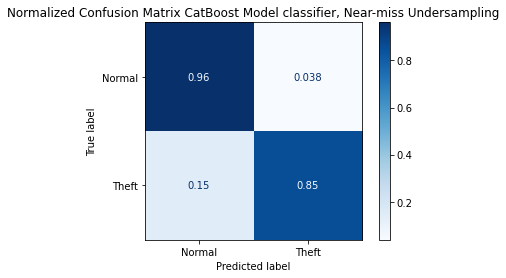

In [184]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix CatBoost Model Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion Matrix CatBoost Model classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_cat,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [185]:
probs_opcat_un = model_cat.predict_proba(x_test)
preds_opcat_un = probs_opcat_un[:,1]
fpr_opcat_un,tpr_opcat_un,thresold = roc_curve(y_test,preds_opcat_un)
roc_auc_opcat_un = auc(fpr_opcat_un,tpr_opcat_un)

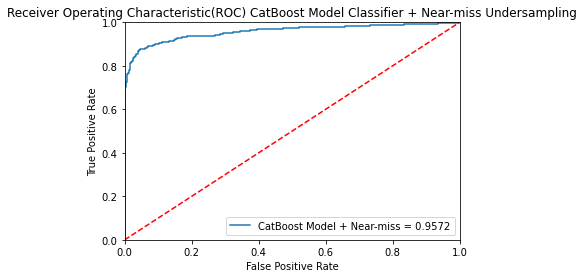

In [186]:
plt.title("Receiver Operating Characteristic(ROC) CatBoost Model Classifier + Near-miss Undersampling")
plt.plot(fpr_opcat_un,tpr_opcat_un,label="CatBoost Model + Near-miss = %0.4f" %roc_auc_opcat_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [187]:
# all ensemble near-miss undersampling

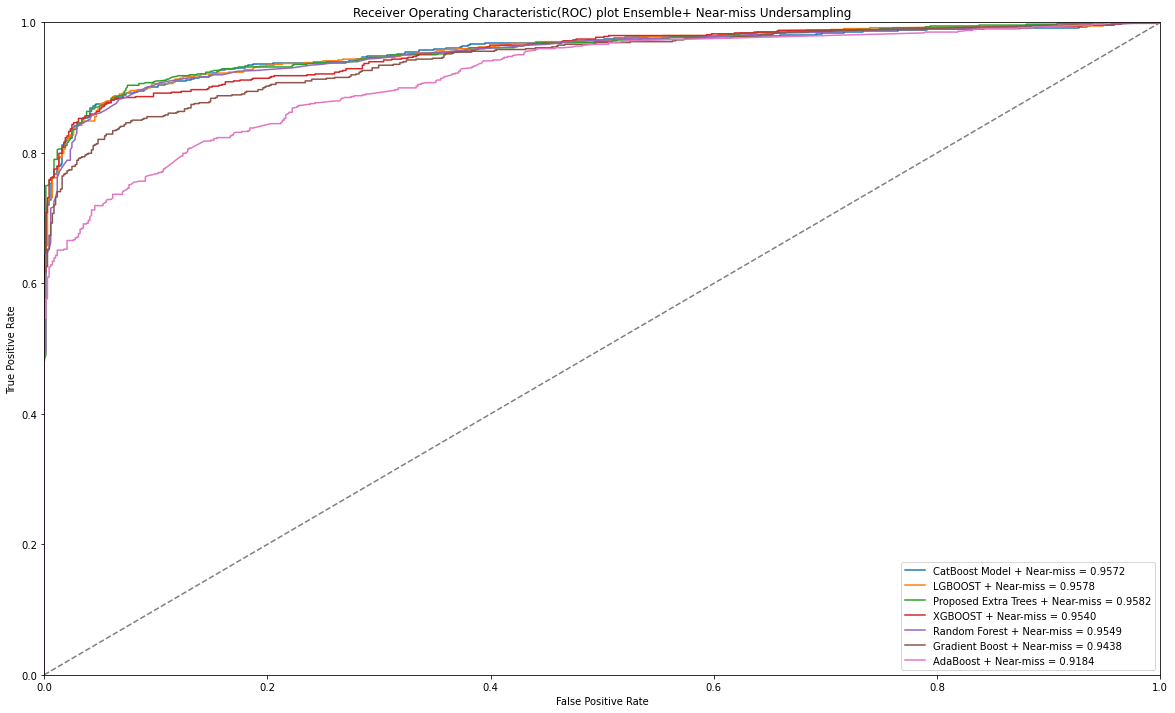

<Figure size 1440x1440 with 0 Axes>

In [188]:
#plotting ensemble
plt.figure(figsize=(20,12))
plt.title("Receiver Operating Characteristic(ROC) plot Ensemble+ Near-miss Undersampling")
plt.plot(fpr_opcat_un,tpr_opcat_un,label="CatBoost Model + Near-miss = %0.4f" %roc_auc_opcat_un)
plt.plot(fpr_light_un,tpr_light_un,label="LGBOOST + Near-miss = %0.4f" %roc_auc_light_un)
plt.plot(fpr_et_un,tpr_et_un,label="Proposed Extra Trees + Near-miss = %0.4f" %roc_auc_et_un)
plt.plot(fpr_xgb_un,tpr_xgb_un,label="XGBOOST + Near-miss = %0.4f" %roc_auc_xgb_un)

plt.plot(fpr_rf_un,tpr_rf_un,label="Random Forest + Near-miss = %0.4f" %roc_auc_rf_un)
plt.plot(fpr_gb_un,tpr_gb_un,label="Gradient Boost + Near-miss = %0.4f" %roc_auc_gb_un)
plt.plot(fpr_ada_un,tpr_ada_un,label="AdaBoost + Near-miss = %0.4f" %roc_auc_ada_un)

plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

SVM + Near-miss Undersampling

In [189]:
model_svm.fit(x_train,y_train)
y_pred_svm_un = model_svm.predict(x_test)
print(classification_report(y_test,y_pred_svm_un))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       684
           1       0.98      0.83      0.90       748

    accuracy                           0.91      1432
   macro avg       0.91      0.91      0.91      1432
weighted avg       0.92      0.91      0.91      1432



In [190]:
matthews_corrcoef(y_test,y_pred_svm_un)

0.8242087556797529

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion SVM Classifier, Near-miss Undersampling
[[674  10]
 [124 624]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion SVM classifier, Near-miss Undersampling
[[0.98538012 0.01461988]
 [0.1657754  0.8342246 ]]


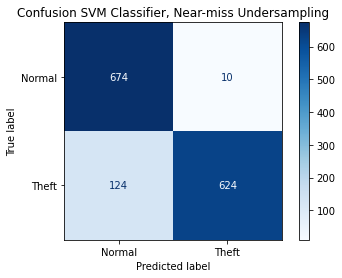

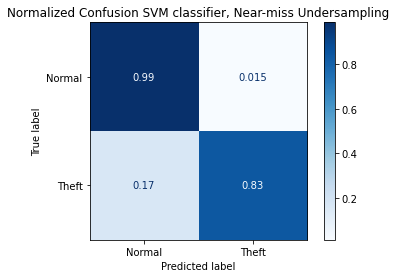

In [191]:
#plotting non-normalized confusion matrix

titles = [("Confusion SVM Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion SVM classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_svm,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [192]:
probs_svm_un = model_svm.predict_proba(x_test)
preds_svm_un = probs_svm_un[:,1]
fpr_svm_un,tpr_svm_un,thresold = roc_curve(y_test,preds_svm_un)
roc_auc_svm_un = auc(fpr_svm_un,tpr_svm_un)

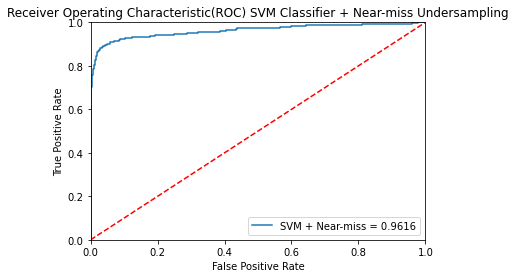

In [193]:
plt.title("Receiver Operating Characteristic(ROC) SVM Classifier + Near-miss Undersampling")
plt.plot(fpr_svm_un,tpr_svm_un,label="SVM + Near-miss = %0.4f" %roc_auc_svm_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Decision Tree + Near-miss Undersampling

In [194]:
model_dt.fit(x_train,y_train)
y_pred_dt_un = model_dt.predict(x_test)
print(classification_report(y_test,y_pred_dt_un))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       684
           1       0.85      0.85      0.85       748

    accuracy                           0.84      1432
   macro avg       0.84      0.84      0.84      1432
weighted avg       0.84      0.84      0.84      1432



In [195]:
matthews_corrcoef(y_test,y_pred_dt_un)

0.6850721935275068

Confusion Decision Tree Classifier, Near-miss Undersampling
[[570 114]
 [111 637]]
Normalized Confusion Decision Tree classifier, Near-miss Undersampling
[[0.83333333 0.16666667]
 [0.14839572 0.85160428]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


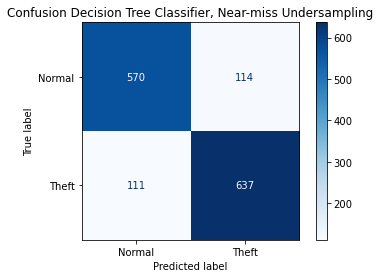

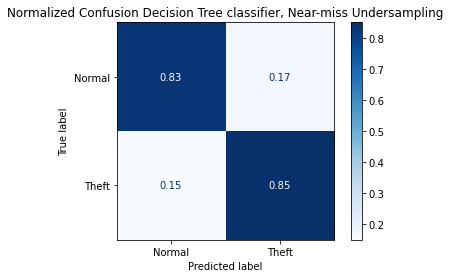

In [196]:
#plotting non-normalized confusion matrix

titles = [("Confusion Decision Tree Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion Decision Tree classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_dt,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [197]:
probs_dt_un = model_dt.predict_proba(x_test)
preds_dt_un = probs_dt_un[:,1]
fpr_dt_un,tpr_dt_un,thresold = roc_curve(y_test,preds_dt_un)
roc_auc_dt_un = auc(fpr_dt_un,tpr_dt_un)

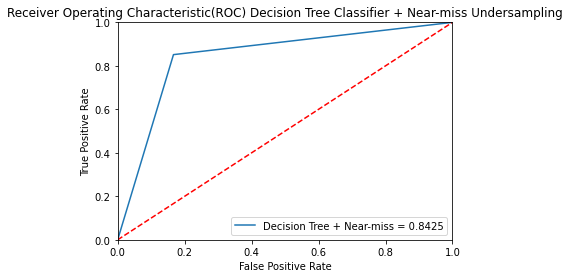

In [198]:
plt.title("Receiver Operating Characteristic(ROC) Decision Tree Classifier + Near-miss Undersampling")
plt.plot(fpr_dt_un,tpr_dt_un,label="Decision Tree + Near-miss = %0.4f" %roc_auc_dt_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Logistic Regression Classifier+ Near-miss Undersampling

In [199]:
model_regress.fit(x_train,y_train)
y_pred_lgress_un = model_regress.predict(x_test)
print(classification_report(y_test,y_pred_lgress_un))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       684
           1       0.91      0.77      0.84       748

    accuracy                           0.84      1432
   macro avg       0.85      0.85      0.84      1432
weighted avg       0.85      0.84      0.84      1432



In [200]:
matthews_corrcoef(y_test,y_pred_lgress_un)

0.6963204911579995

Confusion Logistic Regression Classifier, Near-miss Undersampling
[[629  55]
 [170 578]]
Normalized Confusion Logistic Regression classifier, Near-miss Undersampling
[[0.91959064 0.08040936]
 [0.22727273 0.77272727]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


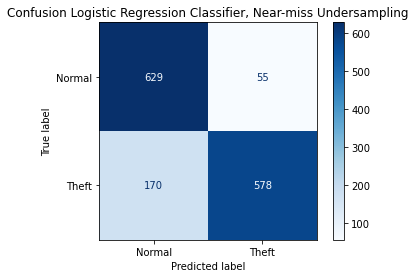

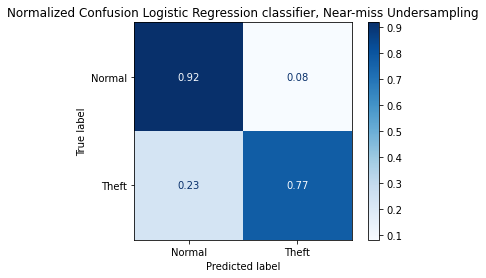

In [201]:
#plotting non-normalized confusion matrix

titles = [("Confusion Logistic Regression Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion Logistic Regression classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_regress,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [202]:
probs_lgress_un = model_regress.predict_proba(x_test)
preds_lgress_un = probs_lgress_un[:,1]
fpr_lgress_un,tpr_lgress_un,thresold = roc_curve(y_test,preds_lgress_un)
roc_auc_lgress_un = auc(fpr_lgress_un,tpr_lgress_un)

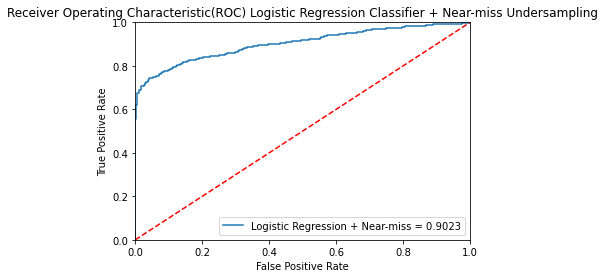

In [203]:
plt.title("Receiver Operating Characteristic(ROC) Logistic Regression Classifier + Near-miss Undersampling")
plt.plot(fpr_lgress_un,tpr_lgress_un,label="Logistic Regression + Near-miss = %0.4f" %roc_auc_lgress_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

LDA Classifier+ Near-miss Undersampling

In [204]:
mod_lda.fit(x_train,y_train)
y_pred_lda_un = mod_lda.predict(x_test)
print(classification_report(y_test,y_pred_lda_un))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       684
           1       0.89      0.67      0.76       748

    accuracy                           0.78      1432
   macro avg       0.80      0.79      0.78      1432
weighted avg       0.80      0.78      0.78      1432



In [205]:
matthews_corrcoef(y_test,y_pred_lda_un)

0.5865192878104841

Confusion LDA Classifier, Near-miss Undersampling
[[620  64]
 [249 499]]
Normalized Confusion LDA classifier, Near-miss Undersampling
[[0.90643275 0.09356725]
 [0.3328877  0.6671123 ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


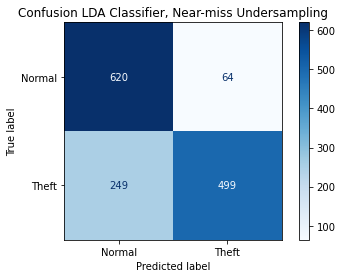

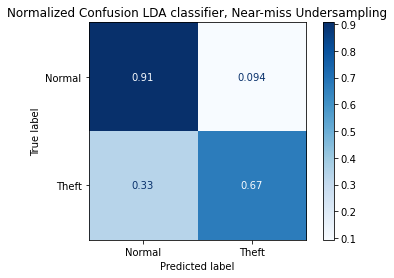

In [206]:
#plotting non-normalized confusion matrix

titles = [("Confusion LDA Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion LDA classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(mod_lda,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [207]:
probs_lda_un = mod_lda.predict_proba(x_test)
preds_lda_un = probs_lda_un[:,1]
fpr_lda_un,tpr_lda_un,thresold = roc_curve(y_test,preds_lda_un)
roc_auc_lda_un = auc(fpr_lda_un,tpr_lda_un)

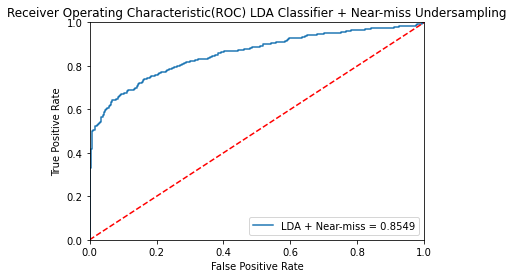

In [208]:
plt.title("Receiver Operating Characteristic(ROC) LDA Classifier + Near-miss Undersampling")
plt.plot(fpr_lda_un,tpr_lda_un,label="LDA + Near-miss = %0.4f" %roc_auc_lda_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

KNN Classifier+ Near-miss Undersampling

In [209]:
model_knn.fit(x_train,y_train)
y_pred_knn_un = model_knn.predict(x_test)
print(classification_report(y_test,y_pred_knn_un))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       684
           1       0.99      0.61      0.76       748

    accuracy                           0.79      1432
   macro avg       0.84      0.80      0.79      1432
weighted avg       0.85      0.79      0.79      1432



In [210]:
matthews_corrcoef(y_test,y_pred_knn_un)

0.6449990702756907

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion KNN Classifier, Near-miss Undersampling
[[679   5]
 [291 457]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion KNN classifier, Near-miss Undersampling
[[0.99269006 0.00730994]
 [0.38903743 0.61096257]]


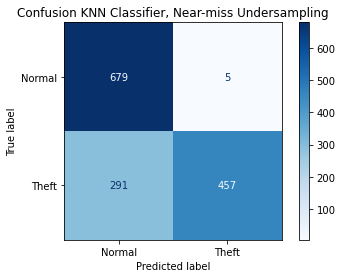

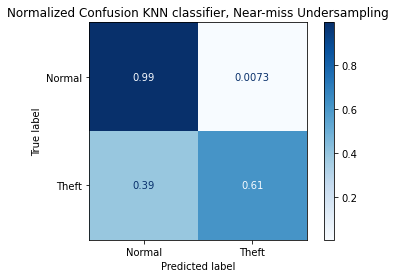

In [211]:
#plotting non-normalized confusion matrix

titles = [("Confusion KNN Classifier, Near-miss Undersampling",None),
         ("Normalized Confusion KNN classifier, Near-miss Undersampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_knn,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()


In [212]:
probs_knn_un = model_knn.predict_proba(x_test)
preds_knn_un = probs_knn_un[:,1]
fpr_knn_un,tpr_knn_un,thresold = roc_curve(y_test,preds_knn_un)
roc_auc_knn_un = auc(fpr_knn_un,tpr_knn_un)

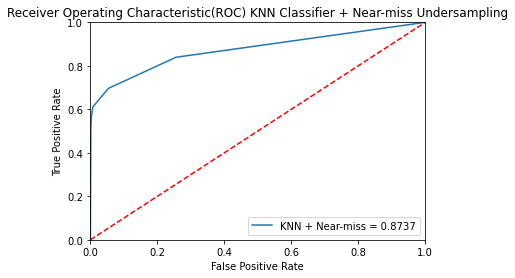

In [213]:
plt.title("Receiver Operating Characteristic(ROC) KNN Classifier + Near-miss Undersampling")
plt.plot(fpr_knn_un,tpr_knn_un,label="KNN + Near-miss = %0.4f" %roc_auc_knn_un)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [214]:
# plotting all near-miss undersampling

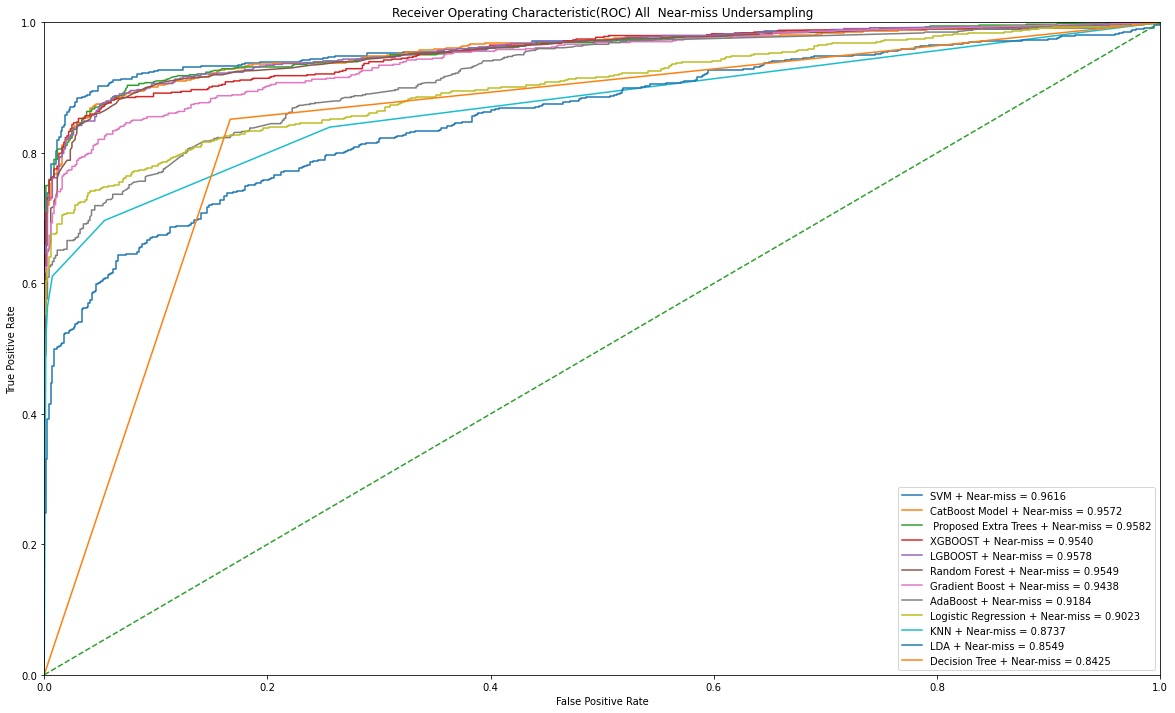

<Figure size 1440x1440 with 0 Axes>

In [215]:
#plotting all
plt.figure(figsize=(20,12))
plt.title("Receiver Operating Characteristic(ROC) All  Near-miss Undersampling")
plt.plot(fpr_svm_un,tpr_svm_un,label="SVM + Near-miss = %0.4f" %roc_auc_svm_un)
plt.plot(fpr_opcat_un,tpr_opcat_un,label="CatBoost Model + Near-miss = %0.4f" %roc_auc_opcat_un)
plt.plot(fpr_et_un,tpr_et_un,label=" Proposed Extra Trees + Near-miss = %0.4f" %roc_auc_et_un)
plt.plot(fpr_xgb_un,tpr_xgb_un,label="XGBOOST + Near-miss = %0.4f" %roc_auc_xgb_un)
plt.plot(fpr_light_un,tpr_light_un,label="LGBOOST + Near-miss = %0.4f" %roc_auc_light_un)
plt.plot(fpr_rf_un,tpr_rf_un,label="Random Forest + Near-miss = %0.4f" %roc_auc_rf_un)
plt.plot(fpr_gb_un,tpr_gb_un,label="Gradient Boost + Near-miss = %0.4f" %roc_auc_gb_un)
plt.plot(fpr_ada_un,tpr_ada_un,label="AdaBoost + Near-miss = %0.4f" %roc_auc_ada_un)
plt.plot(fpr_lgress_un,tpr_lgress_un,label="Logistic Regression + Near-miss = %0.4f" %roc_auc_lgress_un)
plt.plot(fpr_knn_un,tpr_knn_un,label="KNN + Near-miss = %0.4f" %roc_auc_knn_un)
plt.plot(fpr_lda_un,tpr_lda_un,label="LDA + Near-miss = %0.4f" %roc_auc_lda_un)
plt.plot(fpr_dt_un,tpr_dt_un,label="Decision Tree + Near-miss = %0.4f" %roc_auc_dt_un)

plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

### Chosen Models_ for paper

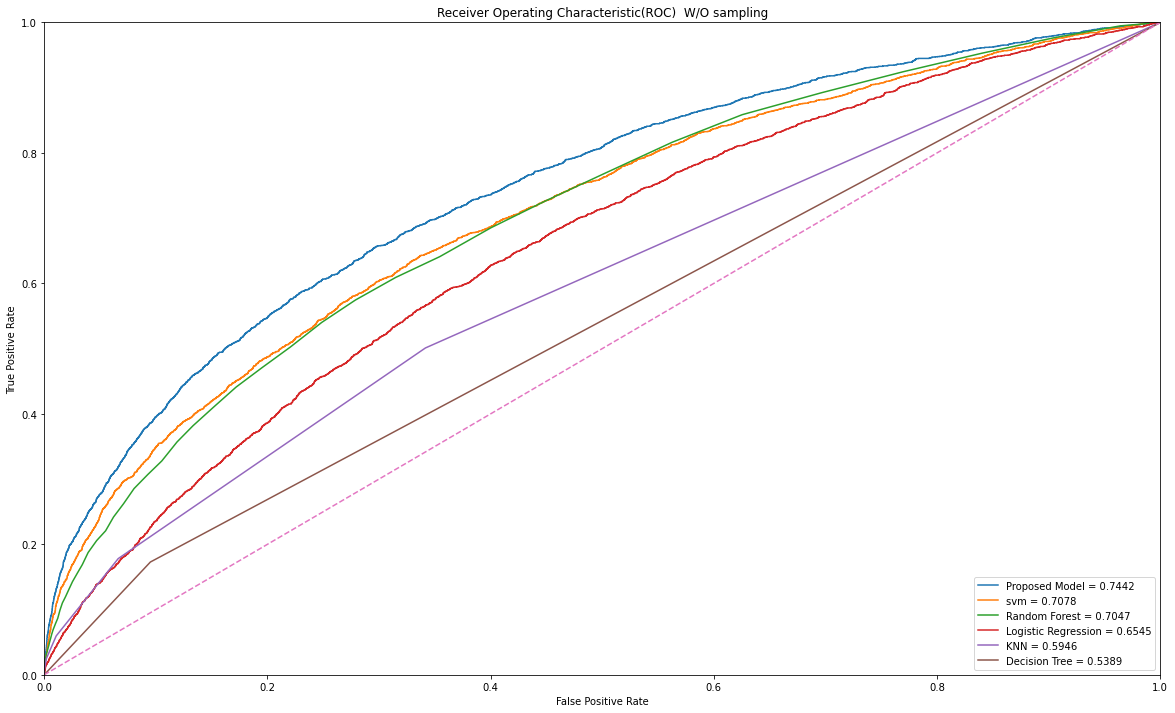

<Figure size 1440x1440 with 0 Axes>

In [216]:
plt.figure(figsize=(20,12))
plt.title("Receiver Operating Characteristic(ROC)  W/O sampling")
plt.plot(fpr_opn,tpr_opn,label="Proposed Model = %0.4f" %roc_auc_opn)
plt.plot(fpr_svm_n,tpr_svm_n,label="svm = %0.4f" %roc_auc_svm_n)
plt.plot(fpr_rfn,tpr_rfn,label="Random Forest = %0.4f" %roc_auc_rfn)
plt.plot(fpr_regress_n,tpr_regress_n,label="Logistic Regression = %0.4f" %roc_auc_regress_n)
plt.plot(fpr_knn,tpr_knn,label="KNN = %0.4f" %roc_auc_knn)
plt.plot(fpr_dtn,tpr_dtn,label="Decision Tree = %0.4f" %roc_auc_dtn)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

## Chosen + Near-miss Undersampling

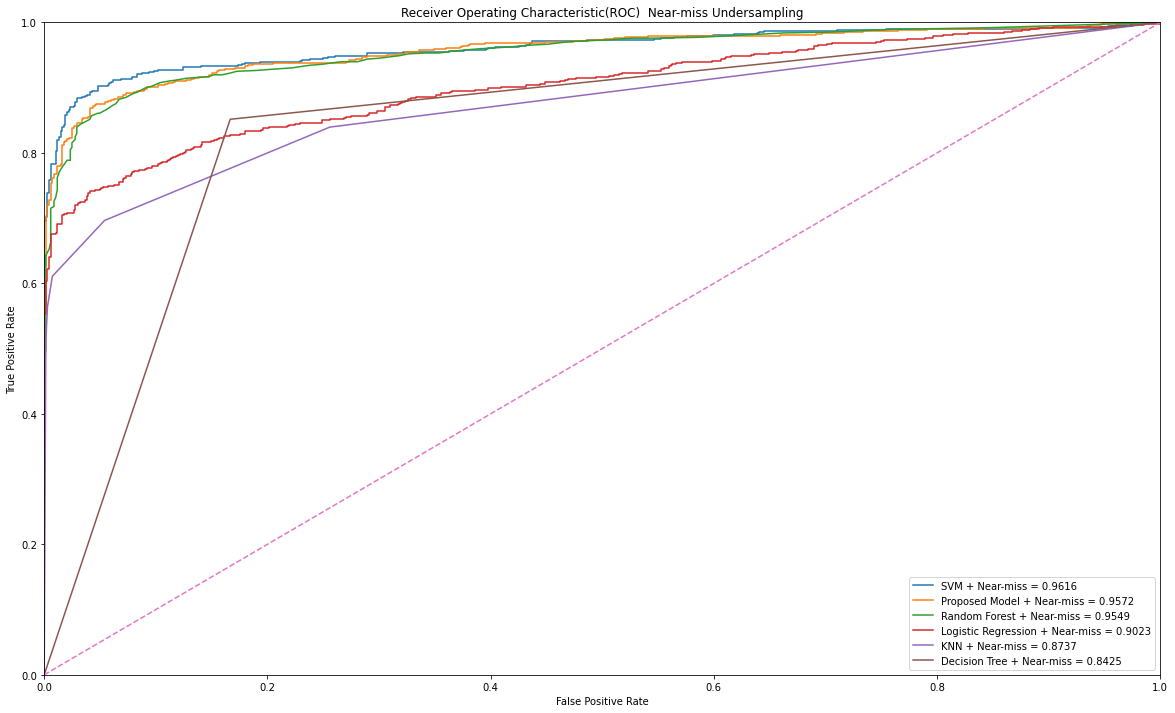

<Figure size 1440x1440 with 0 Axes>

In [217]:
#plotting all
plt.figure(figsize=(20,12))
plt.title("Receiver Operating Characteristic(ROC)  Near-miss Undersampling")
plt.plot(fpr_svm_un,tpr_svm_un,label="SVM + Near-miss = %0.4f" %roc_auc_svm_un)
plt.plot(fpr_opcat_un,tpr_opcat_un,label="Proposed Model + Near-miss = %0.4f" %roc_auc_opcat_un)
plt.plot(fpr_rf_un,tpr_rf_un,label="Random Forest + Near-miss = %0.4f" %roc_auc_rf_un)
plt.plot(fpr_lgress_un,tpr_lgress_un,label="Logistic Regression + Near-miss = %0.4f" %roc_auc_lgress_un)
plt.plot(fpr_knn_un,tpr_knn_un,label="KNN + Near-miss = %0.4f" %roc_auc_knn_un)
plt.plot(fpr_dt_un,tpr_dt_un,label="Decision Tree + Near-miss = %0.4f" %roc_auc_dt_un)

plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

## chosen Model + SMOTE oversampling

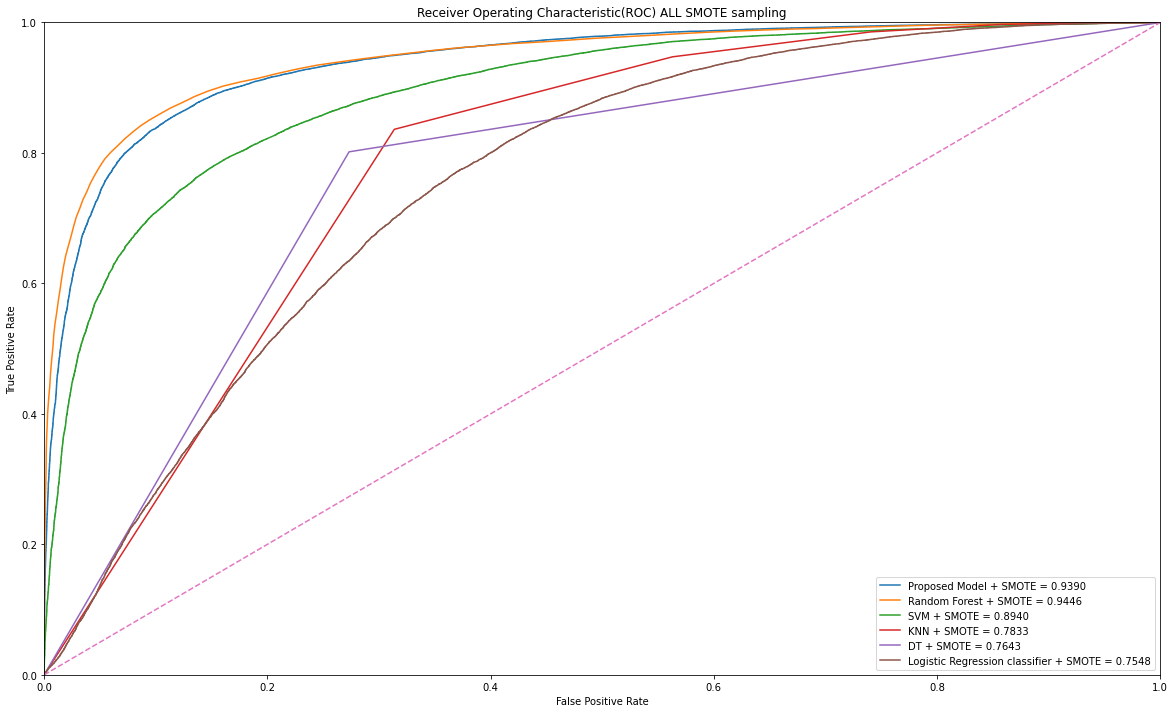

<Figure size 1440x1440 with 0 Axes>

In [218]:
#plotting all
plt.figure(figsize=(20,12))
plt.plot(fpr_opcat_ov,tpr_opcat_ov,label="Proposed Model + SMOTE = %0.4f" %roc_auc_opcat_ov)
plt.title("Receiver Operating Characteristic(ROC) ALL SMOTE sampling")
plt.plot(fpr_rf_ov,tpr_rf_ov,label="Random Forest + SMOTE = %0.4f" %roc_auc_rf_ov)
plt.plot(fpr_svm_ov,tpr_svm_ov,label="SVM + SMOTE = %0.4f" %roc_auc_svm_ov)
plt.plot(fpr_knn_ov,tpr_knn_ov,label="KNN + SMOTE = %0.4f" %roc_auc_knn_ov)
plt.plot(fpr_dt_ov,tpr_dt_ov,label="DT + SMOTE = %0.4f" %roc_auc_dt_ov)
plt.plot(fpr_lgre_ov,tpr_lgre_ov,label="Logistic Regression classifier + SMOTE = %0.4f" %roc_auc_lgre_ov)

plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

In [219]:
#plotting shit

In [216]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980
